# Air Quality Analysis and AQI Prediction Using Machine Learning

## Table of Contents

- **Title**: *Air Quality Analysis and AQI Prediction Using Machine Learning*
  

  - **Table of Contents**
  - **Problem Statement**
  - **Objective**
  - **Importing Necessary Libraries**
  - **Data Collection**
  - **Data Description**
    - Dataset Link
  - **EDA (Exploratory Data Analysis)**
    - Identify Numerical and Categorical Columns
    - Checking for Null Values
    - Checking for Duplicates
    - Understand the Distribution of Data
    - Columns with High Multicollinearity (Correlation > 0.8)
    - Columns with High Correlation with Target ('Ozone & PM AQI') (Correlation > 0.5)
    - Columns to Drop (to Avoid Multicollinearity)
  - **Understanding AQI Categories and Health Impacts**
  - **Data Preprocessing**
    - Handling Columns
    - Handling Missing Values
    - Missing Values in the Target Column
    - Columns with More Than 50% Missing Values
    - Missing Values in Categorical & Numerical Columns
    - Columns with Outliers
  - **Visualization**
  - **Feature Engineering**
    - Label Encoding
    - Feature Scaling
  - **Data Splitting**
  - **Model Training & Evaluation (Without Feature Selection & Hyperparameter Tuning)**
  - **Feature Selection**
    - SelectKBest
    - Recursive Feature Elimination (RFE) with Random Forest Regressor
    - Select From Lasso (L1 Regularization)
  - **Hyperparameter Tuning**
  - **Best Model**
  - **Result**
  - **Model Deployment**
    - Step 1: Save Final Model
    - Step 2: Create `app.py` (Flask)
    - Step 3: Run Flask App
    - Step 4: Test API using Postman
  - **Limitations**
  - **Conclusion**
- **Creating Model Using Pipeline**
  - **Model Deployment**
    - Step 1: Save Final Model
    - Step 2: Create `app.py` (Flask)
    - Step 3: Run Flask App
    - Step 4: Test API using Postman


## Problem Statement

#### Rising air pollution levels pose serious threats to public health and the environment. Predicting air quality is essential for timely public alerts, health recommendations, and effective policy-making. This project aims to model and predict the overall air quality index (AQI) using environmental and site-specific features from EPA monitoring stations.


## Objective

#### To analyze and predict air quality using real-time pollutant data, identify key environmental factors influencing AQI, and assist in public health decision-making through accurate forecasting.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')



## Data Collection

In [3]:
df= pd.read_csv("Air Now Current Monitor Data Public.csv")


In [4]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


EPA AQS ID Country Code                      Data Source EPA Region  \
0  060450006           US            Mendocino County AQMD         R9   
1  060450008           US            Mendocino County AQMD         R9   
2  060450010           US            Mendocino County AQMD         R9   
3  060452002           US            Mendocino County AQMD         R9   
4  060470003           US  San Joaquin Valley Unified APCD         R9   

   Elevation  GMT Offset Amount (hours)   Latitude      Local Time at Monitor  \
0      189.1                         -8  39.150478  2025-05-02 01:00:00 GMT-8   
1      187.6                         -8  39.145733  2025-05-02 01:00:00 GMT-8   
2       48.5                         -8  39.437340  2025-05-02 01:00:00 GMT-8   
3      427.0                         -8  39.411761  2025-05-02 01:00:00 GMT-8   
4        0.0                         -8  37.281700  2025-05-02 01:00:00 GMT-8   

    Longitude  OZONE  ...  PM2.5 & PM10 AQI (For Sorting)  \
0 -123.206528    NaN  ...                              48   
1 -123.202995    NaN  ...                            -999   
2 -123.787660    NaN  ...                              20   
3 -123.352600    NaN  ...                            -999   
4 -120.433601    NaN  ...                            -999   

                      Reporting Area(s)                 Site Name  State Name  \
0                                 Ukiah             Ukiah Library          CA   
1  Fort Bragg|Willits|Ukiah|Point Arena     Ukiah District Office          CA   
2                Fort Bragg|Point Arena    Fort Bragg High School          CA   
3                               Willits  Willits Justice Building          CA   
4                                Merced    Merced - S. Coffee Ave          CA   

  Site Operational Status            ValidTime   ObjectId MonitorType  \
0                  Active  5/2/2025 9:00:00 AM  474959094   Permanent   
1                Inactive  5/2/2025 9:00:00 AM  474959095   Permanent   
2                  Active  5/2/2025 9:00:00 AM  474959096   Permanent   
3                Inactive  5/2/2025 9:00:00 AM  474959097   Permanent   
4                Inactive  5/2/2025 9:00:00 AM  474959098   Permanent   

              x             y  
0 -1.371529e+07  4.743249e+06  
1 -1.371489e+07  4.742568e+06  
2 -1.377998e+07  4.784512e+06  
3 -1.373155e+07  4.780826e+06  
4 -1.340661e+07  4.478445e+06  

[5 rows x 42 columns]

In [5]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
df.tail()

Last few rows of the dataset:


EPA AQS ID Country Code  \
495  MMCA81010           US   
496  MMCA81011           US   
497  MMCA81034           US   
498  MMCA81036           US   
499  MMGBU1000           US   

                                           Data Source EPA Region  Elevation  \
495                     California Air Resources Board         R9        0.0   
496                     California Air Resources Board         R9        0.0   
497                     California Air Resources Board         R9        0.0   
498                     California Air Resources Board         R9        0.0   
499  Great Basin Unified Air Pollution Control Dist...         R9        0.0   

     GMT Offset Amount (hours)  Latitude      Local Time at Monitor  \
495                         -8  39.95035  2025-05-02 01:00:00 GMT-8   
496                         -8  39.93894  2025-05-02 01:00:00 GMT-8   
497                         -8  41.25184  2025-05-02 01:00:00 GMT-8   
498                         -8  40.55232  2025-05-02 01:00:00 GMT-8   
499                         -8  37.64580  2025-05-02 01:00:00 GMT-8   

     Longitude  OZONE  ...  PM2.5 & PM10 AQI (For Sorting) Reporting Area(s)  \
495 -120.96949    NaN  ...                              15               NaN   
496 -120.91477    NaN  ...                              29               NaN   
497 -122.12837    NaN  ...                            -999               NaN   
498 -123.16495    NaN  ...                            -999               NaN   
499 -118.96661    NaN  ...                              61     Mammoth Lakes   

                    Site Name  State Name Site Operational Status  \
495                 MMCA81010          MM                  Active   
496                 MMCA81011          CA                  Active   
497                 MMCA81034          MM                  Active   
498                 MMCA81036          MM                  Active   
499  PM2.5 Mammoth Lakes EBAM          MM                  Active   

               ValidTime   ObjectId MonitorType             x             y  
495  5/2/2025 9:00:00 AM  474963465   Temporary -1.346626e+07  4.858730e+06  
496  5/2/2025 9:00:00 AM  474963466   Temporary -1.346017e+07  4.857073e+06  
497  5/2/2025 9:00:00 AM  474963467   Temporary -1.359527e+07  5.049559e+06  
498  5/2/2025 9:00:00 AM  474963468   Temporary -1.371066e+07  4.946532e+06  
499  5/2/2025 9:00:00 AM  474963474   Temporary -1.324330e+07  4.529509e+06  

[5 rows x 42 columns]

## Data Description

### Dataset Link:
https://drive.google.com/file/d/1qEhnxnsgnBe4i6M9CNcGev0LaFsyu3kf/view?usp=sharing




##### The AirNow dataset contains real-time air quality data reported by various monitoring sites across the United States.The dataset has 500 rows and 42 columns, with a mix of numerical and categorical data.

## EDA (Exploratory Data Analysis)

#### Check the shape of Dataset

In [6]:
#shape
df.shape

(500, 42)

#### There are 500 rows and 42 columns in the dataset.

In [7]:
# Get a summary of the dataset
print("Summary of the dataset:")
df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EPA AQS ID                       500 non-null    object 
 1   Country Code                     500 non-null    object 
 2   Data Source                      500 non-null    object 
 3   EPA Region                       500 non-null    object 
 4   Elevation                        500 non-null    float64
 5   GMT Offset Amount (hours)        500 non-null    int64  
 6   Latitude                         500 non-null    float64
 7   Local Time at Monitor            500 non-null    object 
 8   Longitude                        500 non-null    float64
 9   OZONE                            190 non-null    float64
 10  Ozone & PM AQI                   329 non-null    float64
 11  Ozone & PM AQI (For Labeling)    500 non-null    object 
 12

In [8]:
# Displaying all column names in the DataFrame
df.columns

Index(['EPA AQS ID', 'Country Code', 'Data Source', 'EPA Region', 'Elevation',
       'GMT Offset Amount (hours)', 'Latitude', 'Local Time at Monitor',
       'Longitude', 'OZONE', 'Ozone & PM AQI', 'Ozone & PM AQI (For Labeling)',
       'Ozone & PM AQI (For Sorting)', 'Ozone AQI', 'Ozone AQI (For Labeling)',
       'Ozone AQI (For Sorting)', 'Ozone Measured at Site',
       'Ozone Unit of Measure', 'PM10', 'PM10 AQI', 'PM10 AQI (For Labeling)',
       'PM10 AQI (For Sorting)', 'PM10 Measured at Site',
       'PM10 Unit of Measure', 'PM2.5', 'PM2.5 AQI',
       'PM2.5 AQI (For Labeling)', 'PM2.5 AQI (For Sorting)',
       'PM2.5 Measured at Site', 'PM2.5 Unit of Measure', 'PM2.5 & PM10 AQI',
       'PM2.5 & PM10 AQI (For Labeling)', 'PM2.5 & PM10 AQI (For Sorting)',
       'Reporting Area(s)', 'Site Name', 'State Name',
       'Site Operational Status', 'ValidTime', 'ObjectId', 'MonitorType', 'x',
       'y'],
      dtype='object')

In [9]:
# Removing spaces from column names
df.columns=df.columns.str.replace(" ","")
df.columns

Index(['EPAAQSID', 'CountryCode', 'DataSource', 'EPARegion', 'Elevation',
       'GMTOffsetAmount(hours)', 'Latitude', 'LocalTimeatMonitor', 'Longitude',
       'OZONE', 'Ozone&PMAQI', 'Ozone&PMAQI(ForLabeling)',
       'Ozone&PMAQI(ForSorting)', 'OzoneAQI', 'OzoneAQI(ForLabeling)',
       'OzoneAQI(ForSorting)', 'OzoneMeasuredatSite', 'OzoneUnitofMeasure',
       'PM10', 'PM10AQI', 'PM10AQI(ForLabeling)', 'PM10AQI(ForSorting)',
       'PM10MeasuredatSite', 'PM10UnitofMeasure', 'PM2.5', 'PM2.5AQI',
       'PM2.5AQI(ForLabeling)', 'PM2.5AQI(ForSorting)', 'PM2.5MeasuredatSite',
       'PM2.5UnitofMeasure', 'PM2.5&PM10AQI', 'PM2.5&PM10AQI(ForLabeling)',
       'PM2.5&PM10AQI(ForSorting)', 'ReportingArea(s)', 'SiteName',
       'StateName', 'SiteOperationalStatus', 'ValidTime', 'ObjectId',
       'MonitorType', 'x', 'y'],
      dtype='object')

### Identify numerical and categorical columns

In [10]:
# Selecting and printing numerical columns
num_cols = df.select_dtypes(include='number').columns
print(num_cols)

Index(['Elevation', 'GMTOffsetAmount(hours)', 'Latitude', 'Longitude', 'OZONE',
       'Ozone&PMAQI', 'Ozone&PMAQI(ForSorting)', 'OzoneAQI',
       'OzoneAQI(ForSorting)', 'OzoneMeasuredatSite', 'PM10', 'PM10AQI',
       'PM10AQI(ForSorting)', 'PM10MeasuredatSite', 'PM2.5', 'PM2.5AQI',
       'PM2.5AQI(ForSorting)', 'PM2.5MeasuredatSite', 'PM2.5&PM10AQI',
       'PM2.5&PM10AQI(ForSorting)', 'ObjectId', 'x', 'y'],
      dtype='object')


In [11]:
# Counting the number of numerical columns
num_count = len(num_cols)
print("Number of numerical columns:", num_count)


Number of numerical columns: 23


In [12]:
# Selecting and printing categorical columns
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols )

Index(['EPAAQSID', 'CountryCode', 'DataSource', 'EPARegion',
       'LocalTimeatMonitor', 'Ozone&PMAQI(ForLabeling)',
       'OzoneAQI(ForLabeling)', 'OzoneUnitofMeasure', 'PM10AQI(ForLabeling)',
       'PM10UnitofMeasure', 'PM2.5AQI(ForLabeling)', 'PM2.5UnitofMeasure',
       'PM2.5&PM10AQI(ForLabeling)', 'ReportingArea(s)', 'SiteName',
       'StateName', 'SiteOperationalStatus', 'ValidTime', 'MonitorType'],
      dtype='object')


In [13]:
# Counting the number of categorical columns
cat_count = len(cat_cols)
print("Number of categorical columns:", cat_count)

Number of categorical columns: 19


#### Out of the 42 columns in the dataset, 23 are numerical and 19 are categorical

### Checking for null values

In [14]:
# finding missing values
df.isnull().sum()

EPAAQSID                        0
CountryCode                     0
DataSource                      0
EPARegion                       0
Elevation                       0
GMTOffsetAmount(hours)          0
Latitude                        0
LocalTimeatMonitor              0
Longitude                       0
OZONE                         310
Ozone&PMAQI                   171
Ozone&PMAQI(ForLabeling)        0
Ozone&PMAQI(ForSorting)         0
OzoneAQI                      294
OzoneAQI(ForLabeling)           0
OzoneAQI(ForSorting)            0
OzoneMeasuredatSite             0
OzoneUnitofMeasure            310
PM10                          340
PM10AQI                       338
PM10AQI(ForLabeling)            0
PM10AQI(ForSorting)             0
PM10MeasuredatSite              0
PM10UnitofMeasure             340
PM2.5                         316
PM2.5AQI                      299
PM2.5AQI(ForLabeling)           0
PM2.5AQI(ForSorting)            0
PM2.5MeasuredatSite             0
PM2.5UnitofMea

##### We are going to ensure data quality for modeling by removing row 171, which contains a missing value in the target column 'Ozone & PM AQI'. This step is crucial because rows with missing target values cannot be used for supervised learning, where the model learns from the relationship between features and the target. By dropping this row, we will maintain the integrity of the training data.


In [15]:
# Percentage of missing values in each column
df.isnull().sum()/df.shape[0]*100

EPAAQSID                       0.0
CountryCode                    0.0
DataSource                     0.0
EPARegion                      0.0
Elevation                      0.0
GMTOffsetAmount(hours)         0.0
Latitude                       0.0
LocalTimeatMonitor             0.0
Longitude                      0.0
OZONE                         62.0
Ozone&PMAQI                   34.2
Ozone&PMAQI(ForLabeling)       0.0
Ozone&PMAQI(ForSorting)        0.0
OzoneAQI                      58.8
OzoneAQI(ForLabeling)          0.0
OzoneAQI(ForSorting)           0.0
OzoneMeasuredatSite            0.0
OzoneUnitofMeasure            62.0
PM10                          68.0
PM10AQI                       67.6
PM10AQI(ForLabeling)           0.0
PM10AQI(ForSorting)            0.0
PM10MeasuredatSite             0.0
PM10UnitofMeasure             68.0
PM2.5                         63.2
PM2.5AQI                      59.8
PM2.5AQI(ForLabeling)          0.0
PM2.5AQI(ForSorting)           0.0
PM2.5MeasuredatSite 

#### If percentage of missing values is greater than 50%, we can drop that columns.
##### OZONE
##### OzoneAQI 
##### OzoneUnitofMeasure 
##### PM10
##### PM10AQI
##### PM10UnitofMeasure
##### PM2.5 
##### PM2.5AQI
##### PM2.5UnitofMeasure 



### Checking for Duplicates

In [16]:
# finding duplicates
df.duplicated().sum()

0

#### There are no duplicate values

In [17]:
# Unique value count for all columns
unique_counts = df.nunique()

# Display the result
print(unique_counts)


EPAAQSID                      500
CountryCode                     1
DataSource                     41
EPARegion                       1
Elevation                     203
GMTOffsetAmount(hours)          3
Latitude                      489
LocalTimeatMonitor              3
Longitude                     489
OZONE                          41
Ozone&PMAQI                    62
Ozone&PMAQI(ForLabeling)       63
Ozone&PMAQI(ForSorting)        63
OzoneAQI                       39
OzoneAQI(ForLabeling)          40
OzoneAQI(ForSorting)           40
OzoneMeasuredatSite             2
OzoneUnitofMeasure              1
PM10                           39
PM10AQI                        38
PM10AQI(ForLabeling)           39
PM10AQI(ForSorting)            39
PM10MeasuredatSite              2
PM10UnitofMeasure               1
PM2.5                          72
PM2.5AQI                       56
PM2.5AQI(ForLabeling)          57
PM2.5AQI(ForSorting)           57
PM2.5MeasuredatSite             2
PM2.5UnitofMea

##### If a column has only one unique value, it provides no useful information for prediction or analysis.
##### CountryCode
##### EPARegion
##### OzoneUnitofMeasure 
##### PM10UnitofMeasure
##### PM2.5UnitofMeasure
##### ValidTime 



#### ID columns used only for identification. They don’t help in prediction, so they should be dropped.
#### EPAAQSID
#### ObjectId 

### Understand the distribution of data

#### 1. Check Descriptive Statistics

In [18]:
# Descriptive statistics
df.describe(include='all')

EPAAQSID CountryCode                      DataSource EPARegion  \
count         500         500                             500       500   
unique        500           1                              41         1   
top     060450006          US  California Air Resources Board        R9   
freq            1         500                              66       500   
mean          NaN         NaN                             NaN       NaN   
std           NaN         NaN                             NaN       NaN   
min           NaN         NaN                             NaN       NaN   
25%           NaN         NaN                             NaN       NaN   
50%           NaN         NaN                             NaN       NaN   
75%           NaN         NaN                             NaN       NaN   
max           NaN         NaN                             NaN       NaN   

          Elevation  GMTOffsetAmount(hours)    Latitude  \
count    500.000000              500.000000  500.000000   
unique          NaN                     NaN         NaN   
top             NaN                     NaN         NaN   
freq            NaN                     NaN         NaN   
mean     177.397600               -7.922000   35.018085   
std      383.819456                0.629849    4.186254   
min       -7.900000              -10.000000   19.060655   
25%        0.000000               -8.000000   33.567330   
50%        0.000000               -8.000000   35.307600   
75%      137.000000               -8.000000   37.683757   
max     2440.000000               -7.000000   41.756130   

               LocalTimeatMonitor   Longitude       OZONE  ...  \
count                         500  500.000000  190.000000  ...   
unique                          3         NaN         NaN  ...   
top     2025-05-02 01:00:00 GMT-8         NaN         NaN  ...   
freq                          380         NaN         NaN  ...   
mean                          NaN -120.131940   32.726316  ...   
std                           NaN    9.457635    9.734510  ...   
min                           NaN -159.365000    4.000000  ...   
25%                           NaN -121.601527   26.000000  ...   
50%                           NaN -119.103459   34.000000  ...   
75%                           NaN -116.027991   39.000000  ...   
max                           NaN -109.539683   61.000000  ...   

        PM2.5&PM10AQI(ForSorting) ReportingArea(s)    SiteName  StateName  \
count                  500.000000              357         496        495   
unique                        NaN              214         479          6   
top                           NaN          Phoenix  San Ysidro         CA   
freq                          NaN               27           3        312   
mean                  -447.366000              NaN         NaN        NaN   
std                    513.894428              NaN         NaN        NaN   
min                   -999.000000              NaN         NaN        NaN   
25%                   -999.000000              NaN         NaN        NaN   
50%                      7.500000              NaN         NaN        NaN   
75%                     29.000000              NaN         NaN        NaN   
max                     66.000000              NaN         NaN        NaN   

       SiteOperationalStatus            ValidTime      ObjectId MonitorType  \
count                    500                  500  5.000000e+02         500   
unique                     2                    1           NaN           2   
top                   Active  5/2/2025 9:00:00 AM           NaN   Permanent   
freq                     373                  500           NaN         466   
mean                     NaN                  NaN  4.749606e+08         NaN   
std                      NaN                  NaN  1.438551e+03         NaN   
min                      NaN                  NaN  4.749591e+08         NaN   
25%                      NaN                  NaN

In [19]:
# descriptive statistics for numerical columns
df.describe().T

count          mean           std           min  \
Elevation                  500.0  1.773976e+02  3.838195e+02 -7.900000e+00   
GMTOffsetAmount(hours)     500.0 -7.922000e+00  6.298487e-01 -1.000000e+01   
Latitude                   500.0  3.501809e+01  4.186254e+00  1.906066e+01   
Longitude                  500.0 -1.201319e+02  9.457635e+00 -1.593650e+02   
OZONE                      190.0  3.272632e+01  9.734510e+00  4.000000e+00   
Ozone&PMAQI                329.0  3.339514e+01  1.407846e+01  3.000000e+00   
Ozone&PMAQI(ForSorting)    500.0 -3.196840e+02  4.903705e+02 -9.990000e+02   
OzoneAQI                   206.0  3.143689e+01  8.573550e+00  9.000000e+00   
OzoneAQI(ForSorting)       500.0 -5.744600e+02  5.077137e+02 -9.990000e+02   
OzoneMeasuredatSite        500.0  5.620000e-01  4.966380e-01  0.000000e+00   
PM10                       160.0  1.884375e+01  1.235968e+01  3.000000e+00   
PM10AQI                    162.0  1.853086e+01  1.091479e+01  3.000000e+00   
PM10AQI(ForSorting)        500.0 -6.693200e+02  4.767217e+02 -9.990000e+02   
PM10MeasuredatSite         500.0  4.160000e-01  4.933871e-01  0.000000e+00   
PM2.5                      184.0  6.331522e+00  4.060483e+00 -4.000000e+00   
PM2.5AQI                   201.0  3.323383e+01  1.585402e+01  0.000000e+00   
PM2.5AQI(ForSorting)       500.0 -5.840420e+02  5.067125e+02 -9.990000e+02   
PM2.5MeasuredatSite        500.0  6.080000e-01  4.886856e-01  0.000000e+00   
PM2.5&PM10AQI              268.0  3.016791e+01  1.592156e+01  1.000000e+00   
PM2.5&PM10AQI(ForSorting)  500.0 -4.473660e+02  5.138944e+02 -9.990000e+02   
ObjectId                   500.0  4.749606e+08  1.438551e+03  4.749591e+08   
x                          500.0 -1.337303e+07  1.052819e+06 -1.774043e+07   
y                          500.0  4.179175e+06  5.468066e+05  2.162078e+06   

                                    25%           50%           75%  \
Elevation                  0.000000e+00  0.000000e+00  1.370000e+02   
GMTOffsetAmount(hours)    -8.000000e+00 -8.000000e+00 -8.000000e+00   
Latitude                   3.356733e+01  3.530760e+01  3.768376e+01   
Longitude                 -1.216015e+02 -1.191035e+02 -1.160280e+02   
OZONE                      2.600000e+01  3.400000e+01  3.900000e+01   
Ozone&PMAQI                2.400000e+01  3.300000e+01  4.300000e+01   
Ozone&PMAQI(ForSorting)   -9.990000e+02  2.400000e+01  3.625000e+01   
OzoneAQI                   2.700000e+01  3.100000e+01  3.600000e+01   
OzoneAQI(ForSorting)      -9.990000e+02 -9.990000e+02  3.100000e+01   
OzoneMeasuredatSite        0.000000e+00  1.000000e+00  1.000000e+00   
PM10                       1.100000e+01  1.700000e+01  2.425000e+01   
PM10AQI                    1.025000e+01  1.700000e+01  2.375000e+01   
PM10AQI(ForSorting)       -9.990000e+02 -9.990000e+02  1.000000e+01   
PM10MeasuredatSite         0.000000e+00  0.000000e+00  1.000000e+00   
PM2.5                      4.000000e+00  5.400000e+00  8.075000e+00   
PM2.5AQI                   2.200000e+01  3.000000e+01  4.800000e+01   
PM2.5AQI(ForSorting)      -9.990000e+02 -9.990000e+02  2.600000e+01   
PM2.5MeasuredatSite        0.000000e+00  1.000000e+00  1.000000e+00   
PM2.5&PM10AQI              1.900000e+01  2.750000e+01  4.225000e+01   
PM2.5&PM10AQI(ForSorting) -9.990000e+02  7.500000e+00  2.900000e+01   
ObjectId                   4.749592e+08  4.749603e+08  4.749614e+08   
x                         -1.353662e+07 -1.325854e+07 -1.291618e+07   
y                          3.970852e+06  4.205762e+06  4.534847e+06   

                                    max  
Elevation                  2.440000e+03  
GMTOffsetAmount(hours)    -7.000000e+00  
Latitude                   4.175613e+01  
Longitude                 -1.095397e+02  
OZONE                      6.100000e+01  
Ozone&PMAQI                7.400000e+01  
Ozone&PMAQI(ForSorting)    7.400000e+01  
OzoneAQI                   7.400000e+01  
OzoneAQI(ForSorting)       7.400000e+01  
OzoneMeasuredatSite        1.

In [20]:
#descriptive statistics for categorical columns (object type)
df.describe(include="object").T

count unique                             top freq
EPAAQSID                     500    500                       060450006    1
CountryCode                  500      1                              US  500
DataSource                   500     41  California Air Resources Board   66
EPARegion                    500      1                              R9  500
LocalTimeatMonitor           500      3       2025-05-02 01:00:00 GMT-8  380
Ozone&PMAQI(ForLabeling)     500     63                              ND  171
OzoneAQI(ForLabeling)        500     40                              ND  294
OzoneUnitofMeasure           190      1                             PPB  190
PM10AQI(ForLabeling)         500     39                              ND  338
PM10UnitofMeasure            160      1                           UG/M3  160
PM2.5AQI(ForLabeling)        500     57                              ND  299
PM2.5UnitofMeasure           184      1                           UG/M3  184
PM2.5&PM10AQI(ForLabeling)   500     61                              ND  232
ReportingArea(s)             357    214                         Phoenix   27
SiteName                     496    479                      San Ysidro    3
StateName                    495      6                              CA  312
SiteOperationalStatus        500      2                          Active  373
ValidTime                    500      1             5/2/2025 9:00:00 AM  500
MonitorType                  500      2                       Permanent  466

#### 2. Plot Distributions of Numerical Features



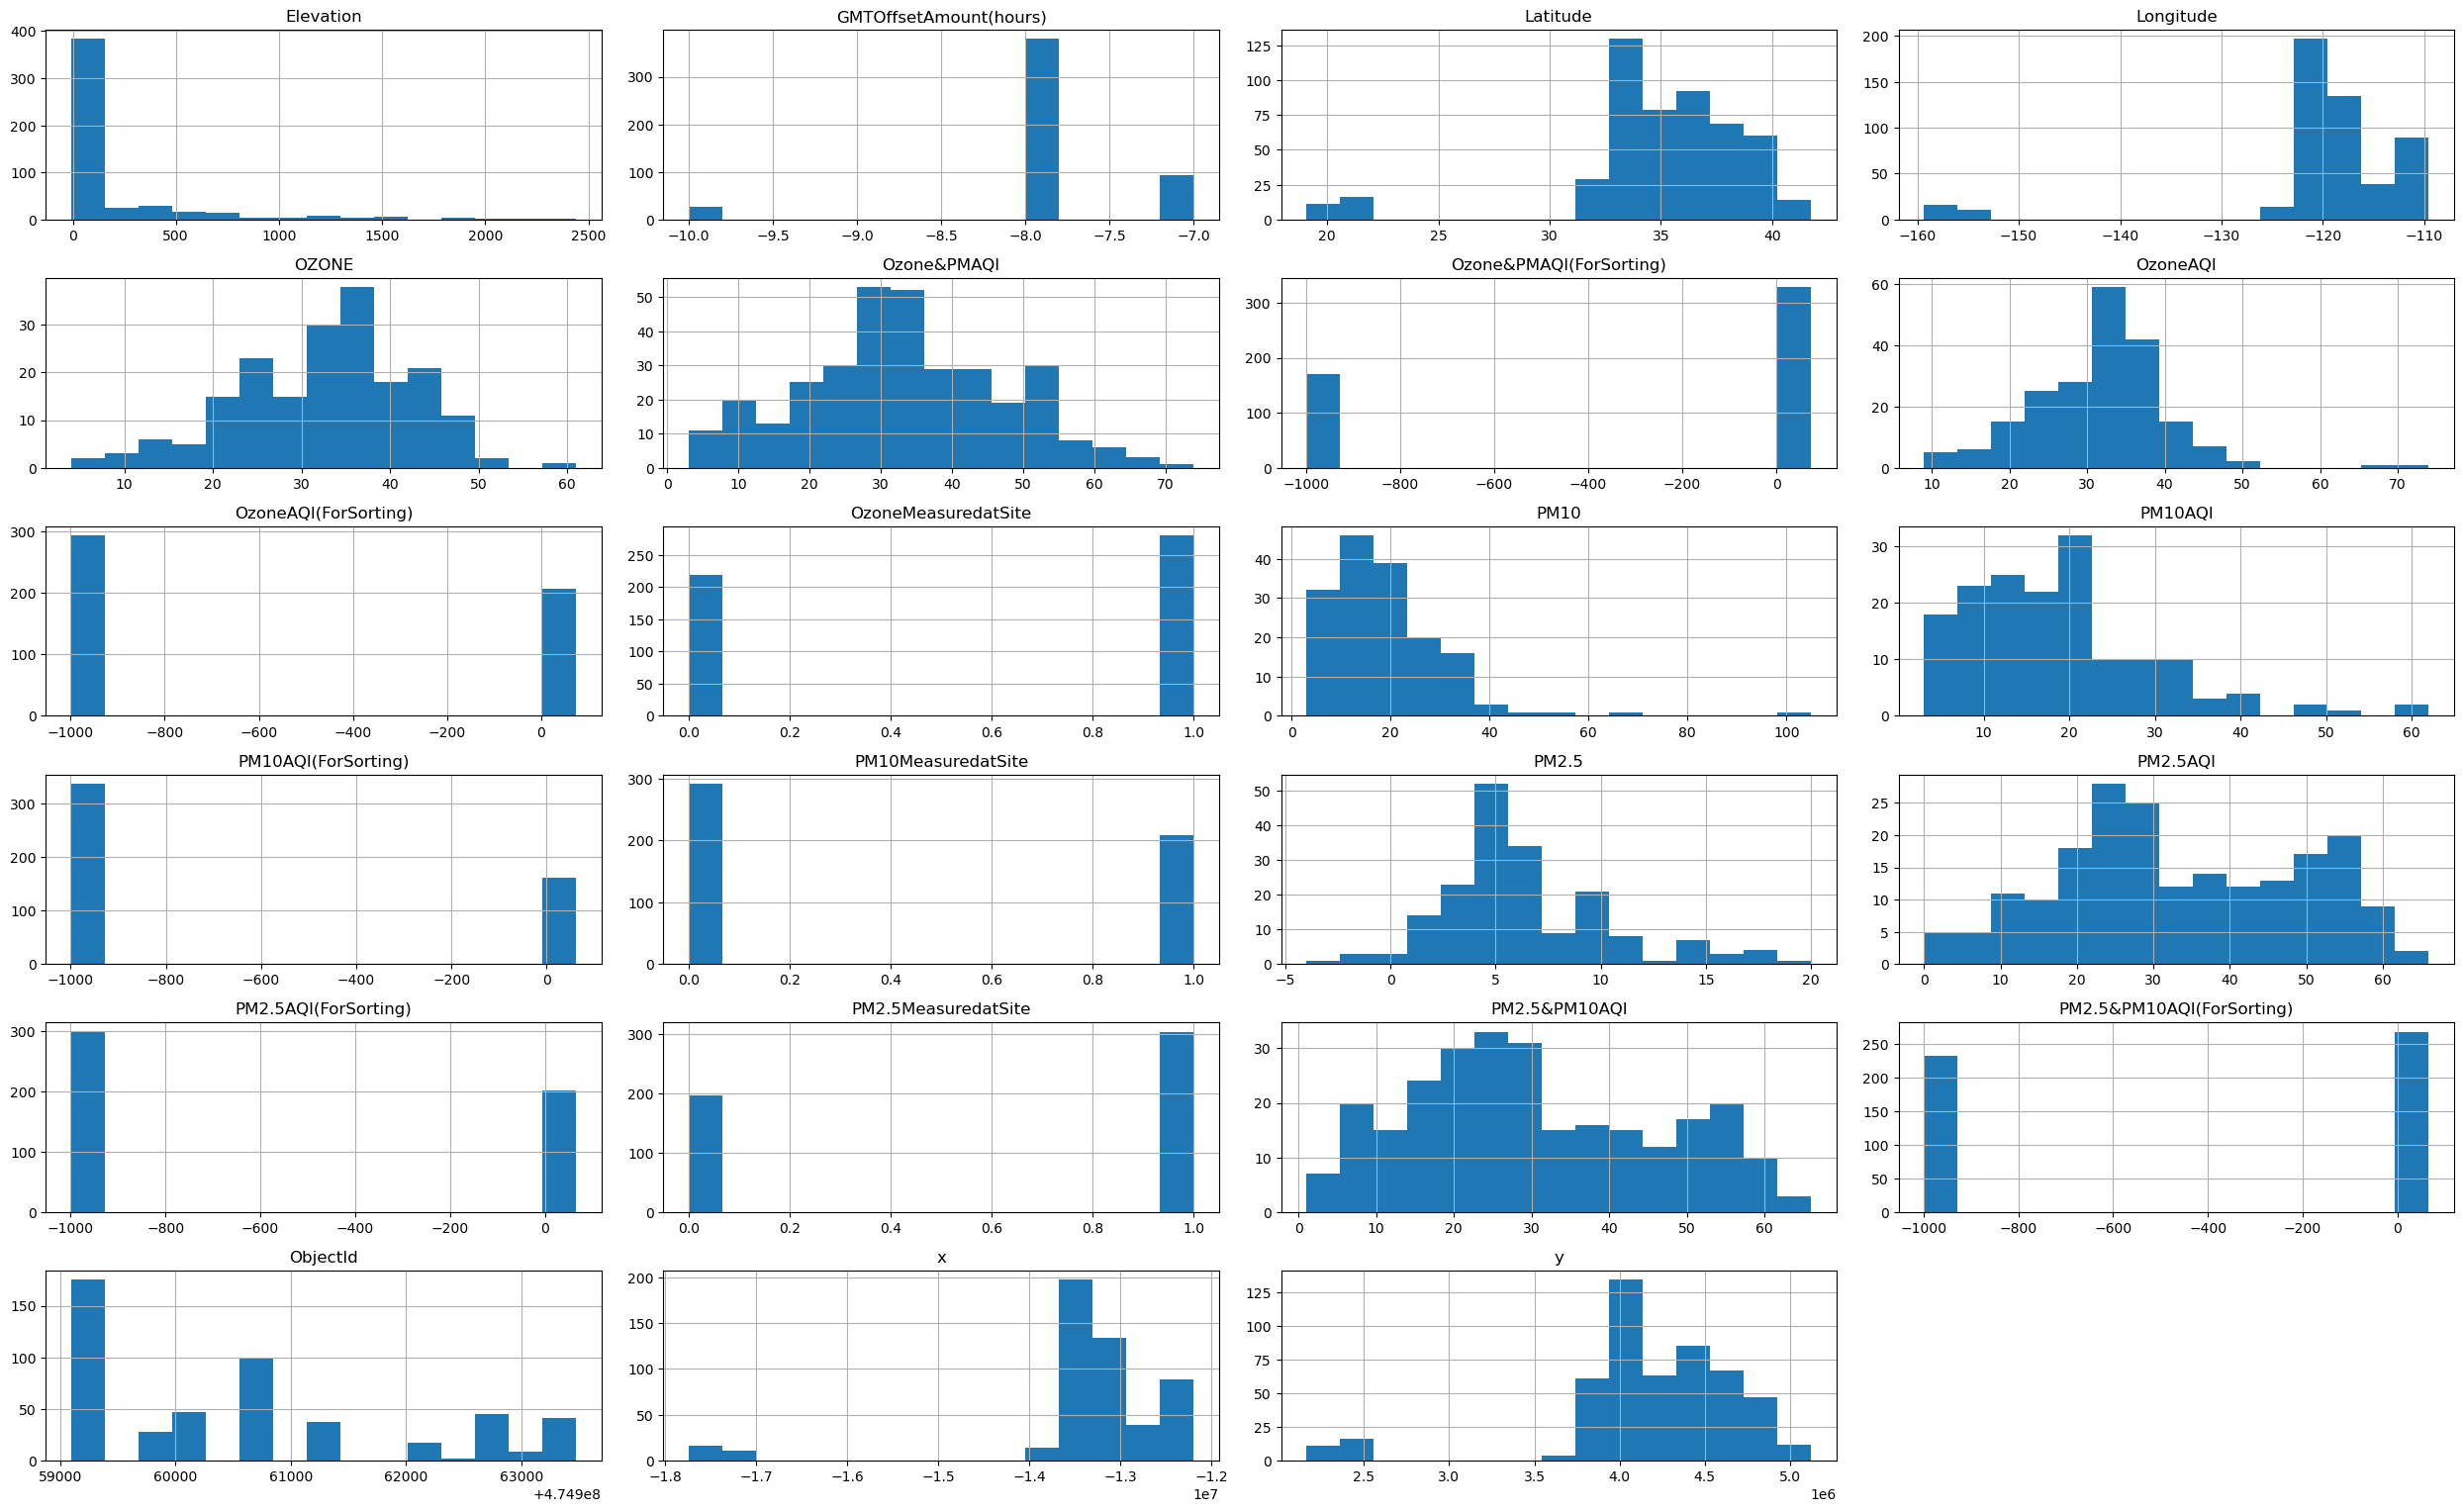

In [21]:
# Histograms for numerical columns
df[num_cols].hist(bins=15, figsize=(25, 25), layout=(10, 4))
plt.tight_layout()
plt.show()


#### 3. Boxplots to Spot Outliers

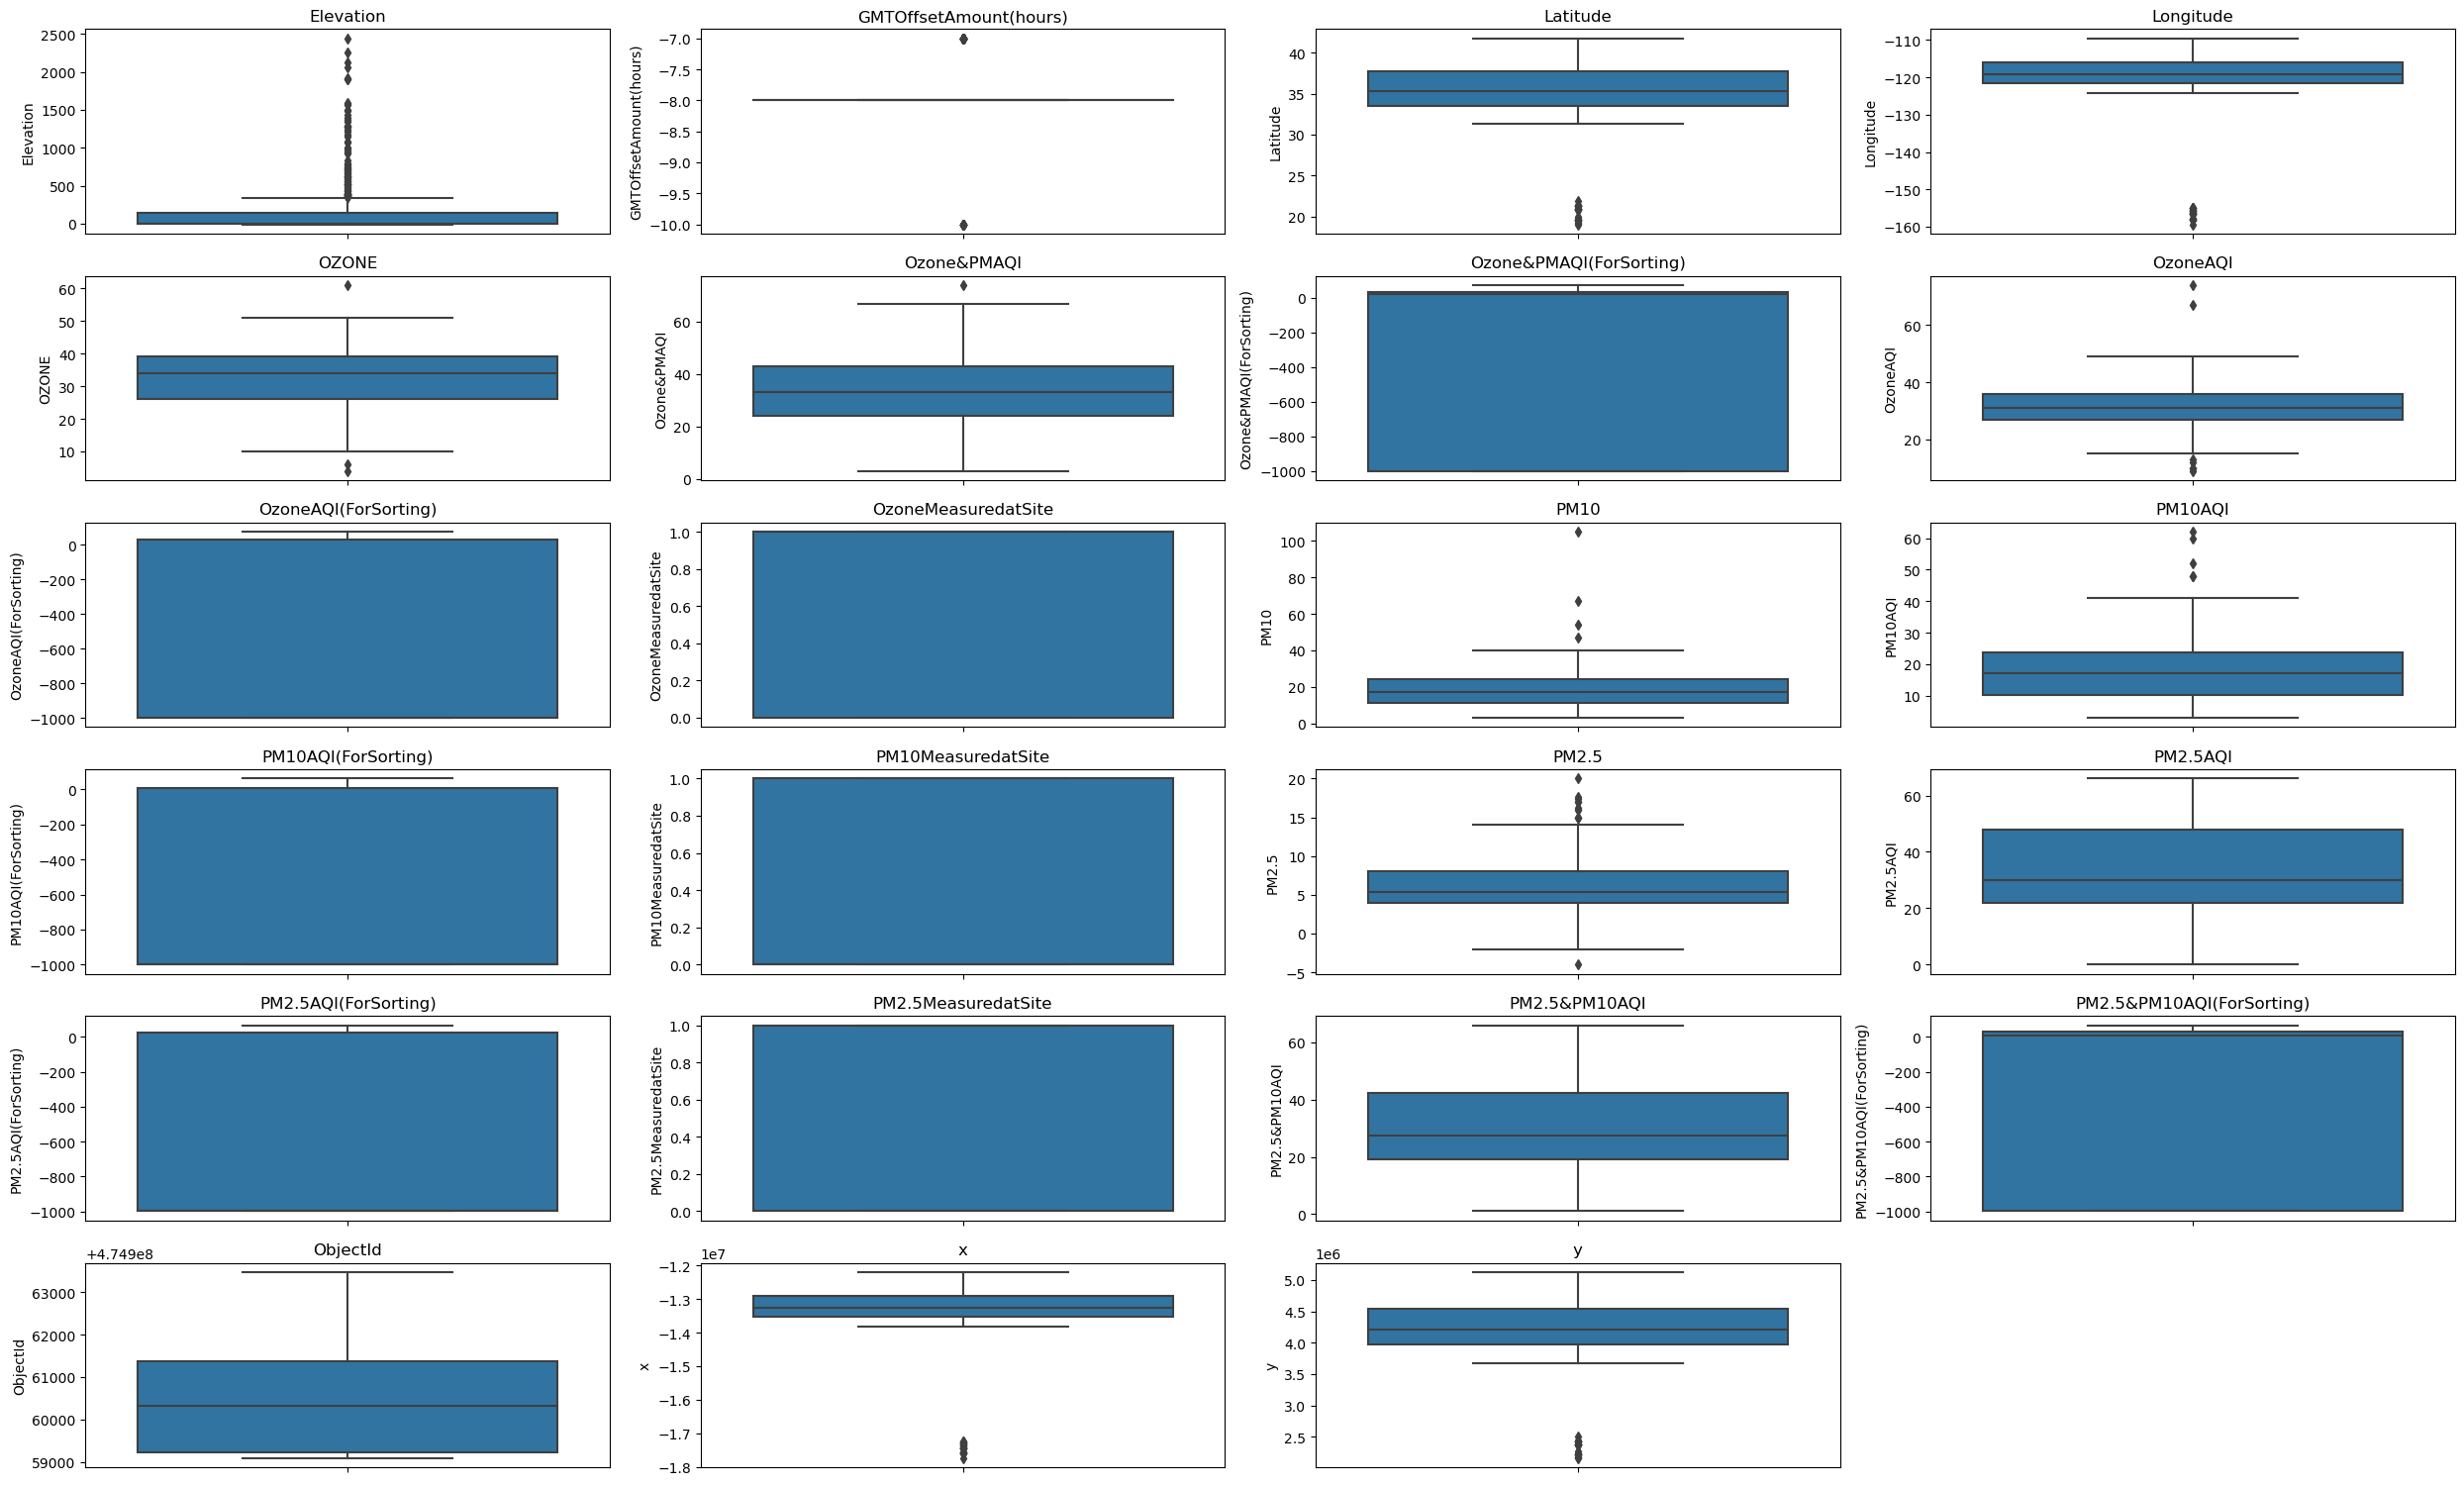

In [22]:
#box plot to identify outliers
plt.figure(figsize=(25, 25))
#enumerate() is a built-in Python function that allows you to loop over an iterable (like a list) and have an automatic counter.
for i, col in enumerate(num_cols):
    plt.subplot(10, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

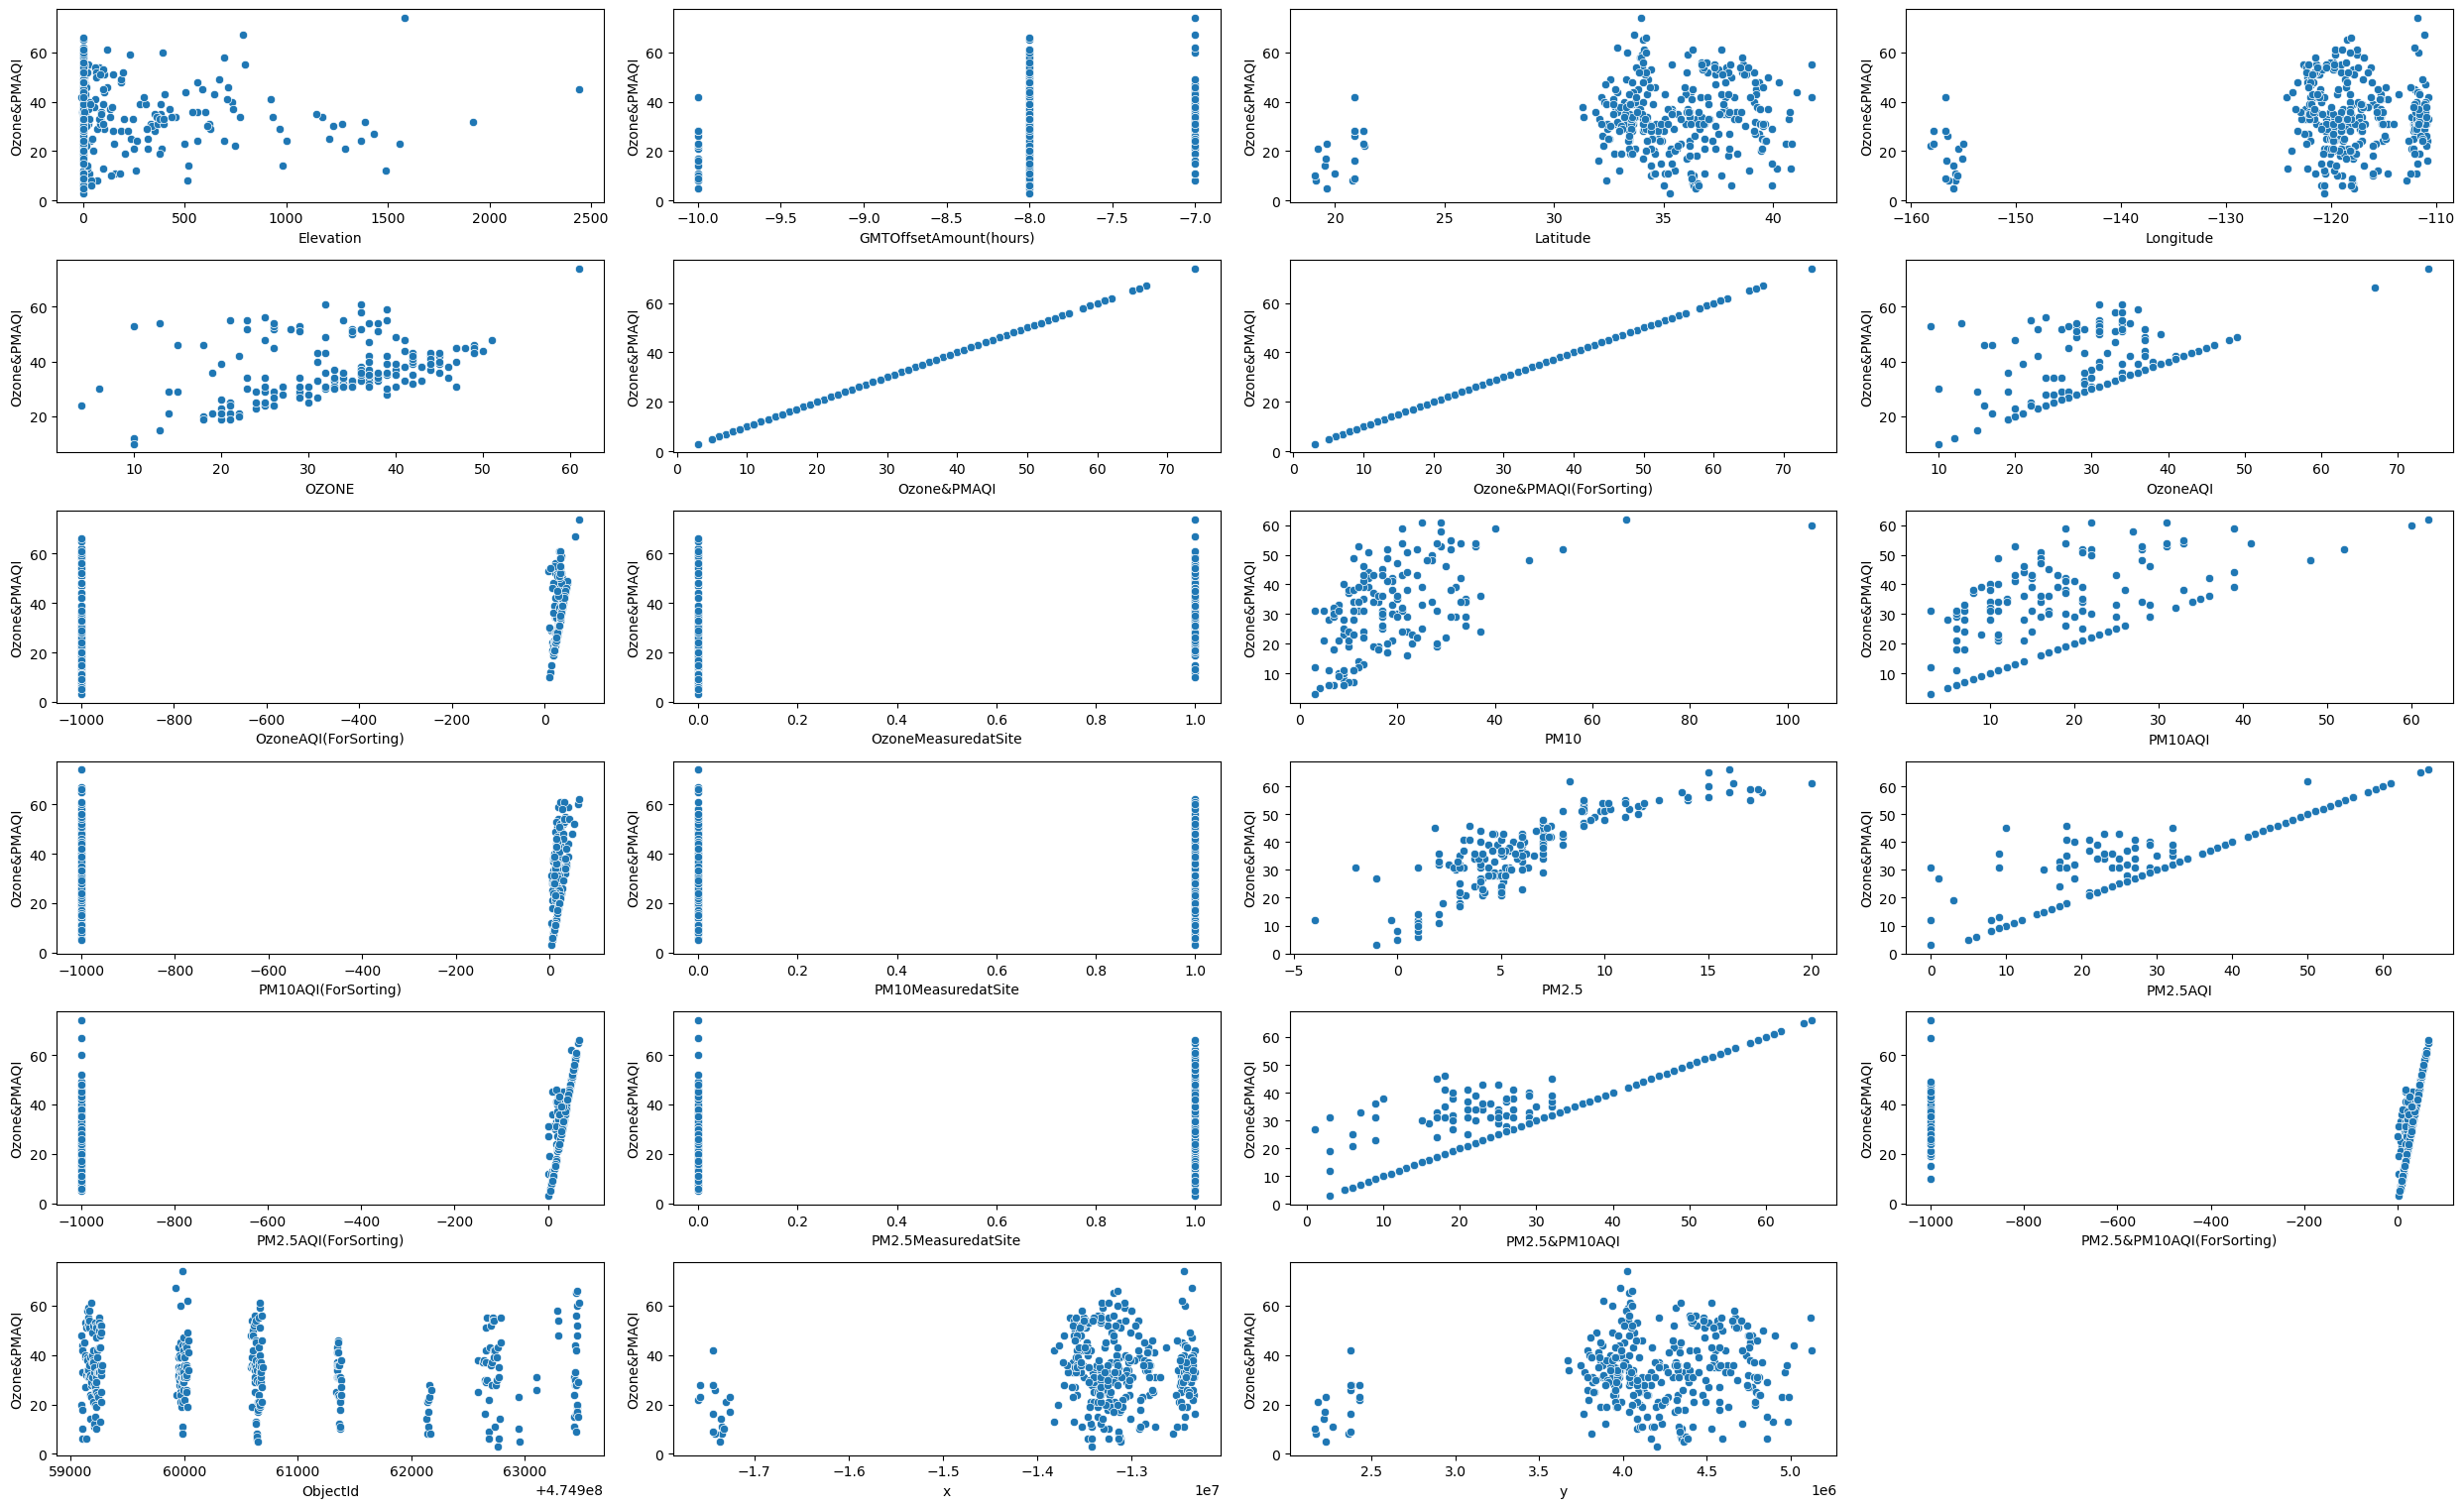

In [23]:
# scatter plot to identify the relationship between dependent and independent features
plt.figure(figsize=(25, 25))
for i, col in enumerate(num_cols):
    plt.subplot(10, 4, i+1)
    sns.scatterplot(data=df,x=col,y='Ozone&PMAQI')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

#### 4. Check  Skewness and Kurtosis

In [24]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurt = df[num_cols].apply(lambda x: kurtosis(x, fisher=False))

print(skewness)
print(kurt)

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

Elevation                    3.032023
GMTOffsetAmount(hours)      -1.361280
Latitude                    -2.054034
Longitude                   -2.965850
OZONE                             NaN
Ozone&PMAQI                       NaN
Ozone&PMAQI(ForSorting)     -0.664419
OzoneAQI                          NaN
OzoneAQI(ForSorting)         0.357940
OzoneMeasuredatSite         -0.249929
PM10                              NaN
PM10AQI                           NaN
PM10AQI(ForSorting)          0.752684
PM10MeasuredatSite           0.340844
PM2.5                             NaN
PM2.5AQI                          NaN
PM2.5AQI(ForSorting)         0.400954
PM2.5MeasuredatSite         -0.442445
PM2.5&PM10AQI                     NaN
PM2.5&PM10AQI(ForSorting)   -0.142825
ObjectId                     0.712678
x                           -2.965850
y                           -1.839421
dtype: float64
Elevation                    12.972900
GMTOffsetAmount(hours)        7.281144
Latitude                      8.3

##### Some columns are showing as NaN as it contains null values.

#### correlation heatmap

<Axes: >

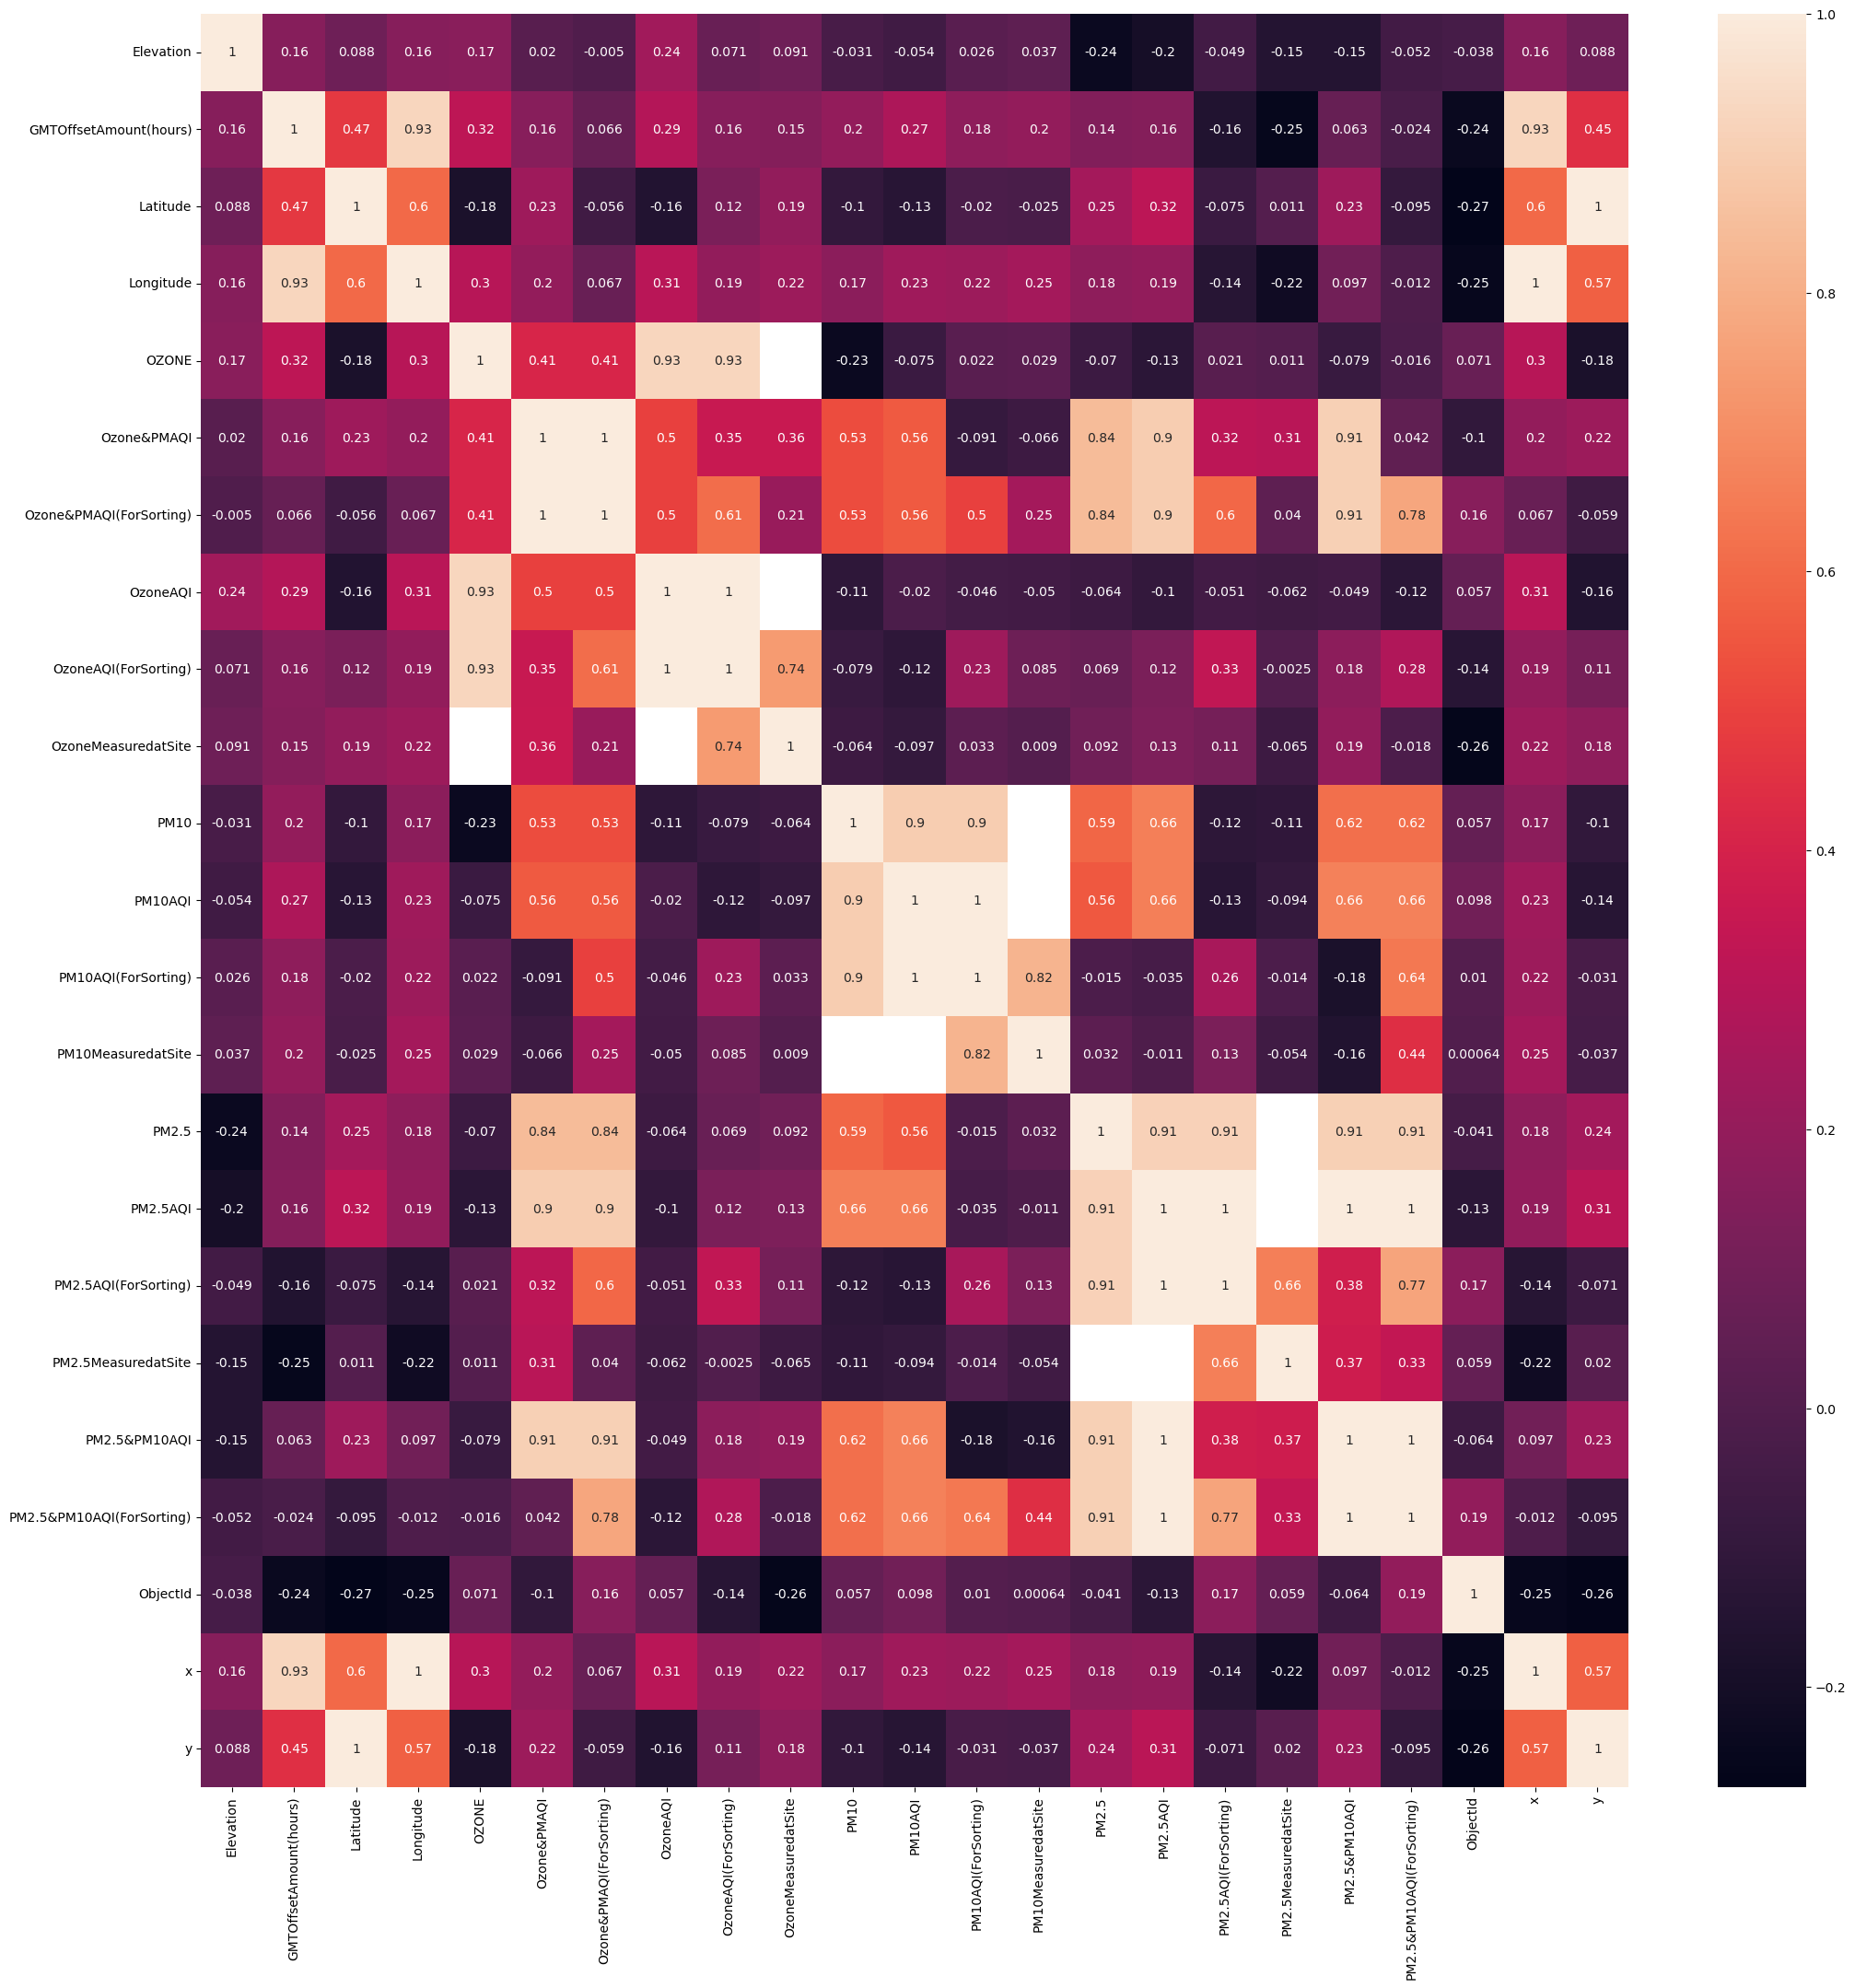

In [25]:
# correlation with heatmap to interpret the relation and multicolliniarity
plt.figure(figsize=(25,25))
sns.heatmap(df[num_cols].corr(),annot=True)

### 1. Columns with High Multicollinearity (Correlation > 0.8):
###### 'Longitude' and 'GMT Offset Amount (hours)' (0.926)

###### ''x' and 'GMT Offset Amount (hours)' (0.926)

###### ''y' and 'Latitude' (0.999)

###### ''x' and 'Longitude' (1.000)

###### ''Ozone AQI' and 'OZONE' (0.969)

###### ''Ozone AQI (For Sorting)' and 'OZONE' (0.969)

###### ''Ozone & PM AQI' and 'Ozone & PM AQI (For Sorting)' (1.000)

###### ''PM10' and 'Ozone & PM AQI' (0.989)

###### ''PM2.5' and 'Ozone & PM AQI' (0.996)

###### ''PM2.5 & PM10 AQI' and 'Ozone & PM AQI' (0.997)

###### ''PM10' and 'PM2.5' (0.994)

###### ''PM10 AQI' and 'PM10' (0.999)

###### ''PM2.5 AQI' and 'PM2.5' (1.000)

### 2. Columns with High Correlation with Target ('Ozone & PM AQI') (Correlation > 0.5):
###### ''Ozone & PM AQI (For Sorting)': 1.000

###### ''PM2.5 & PM10 AQI': 0.997

###### ''PM2.5': 0.996

###### ''PM10 AQI': 0.991

###### ''PM10': 0.989

###### ''PM2.5 AQI': 0.727

### 3.Columns to Drop (to Avoid Multicollinearity):
###### ''GMT Offset Amount (hours)' (correlated with 'Longitude' and 'x')

###### ''y' (correlated with 'Latitude')

###### ''x' (correlated with 'Longitude')

###### ''Ozone AQI (For Sorting)' (correlated with 'Ozone AQI')

###### ''Ozone & PM AQI (For Sorting)' (correlated with 'Ozone & PM AQI')

###### ''PM2.5' (correlated with 'PM10')

###### ''PM2.5 & PM10 AQI' (correlated with 'Ozone & PM AQI')

###### ''PM10 AQI' (correlated with 'PM10')

### Columns with High Multicollinearity

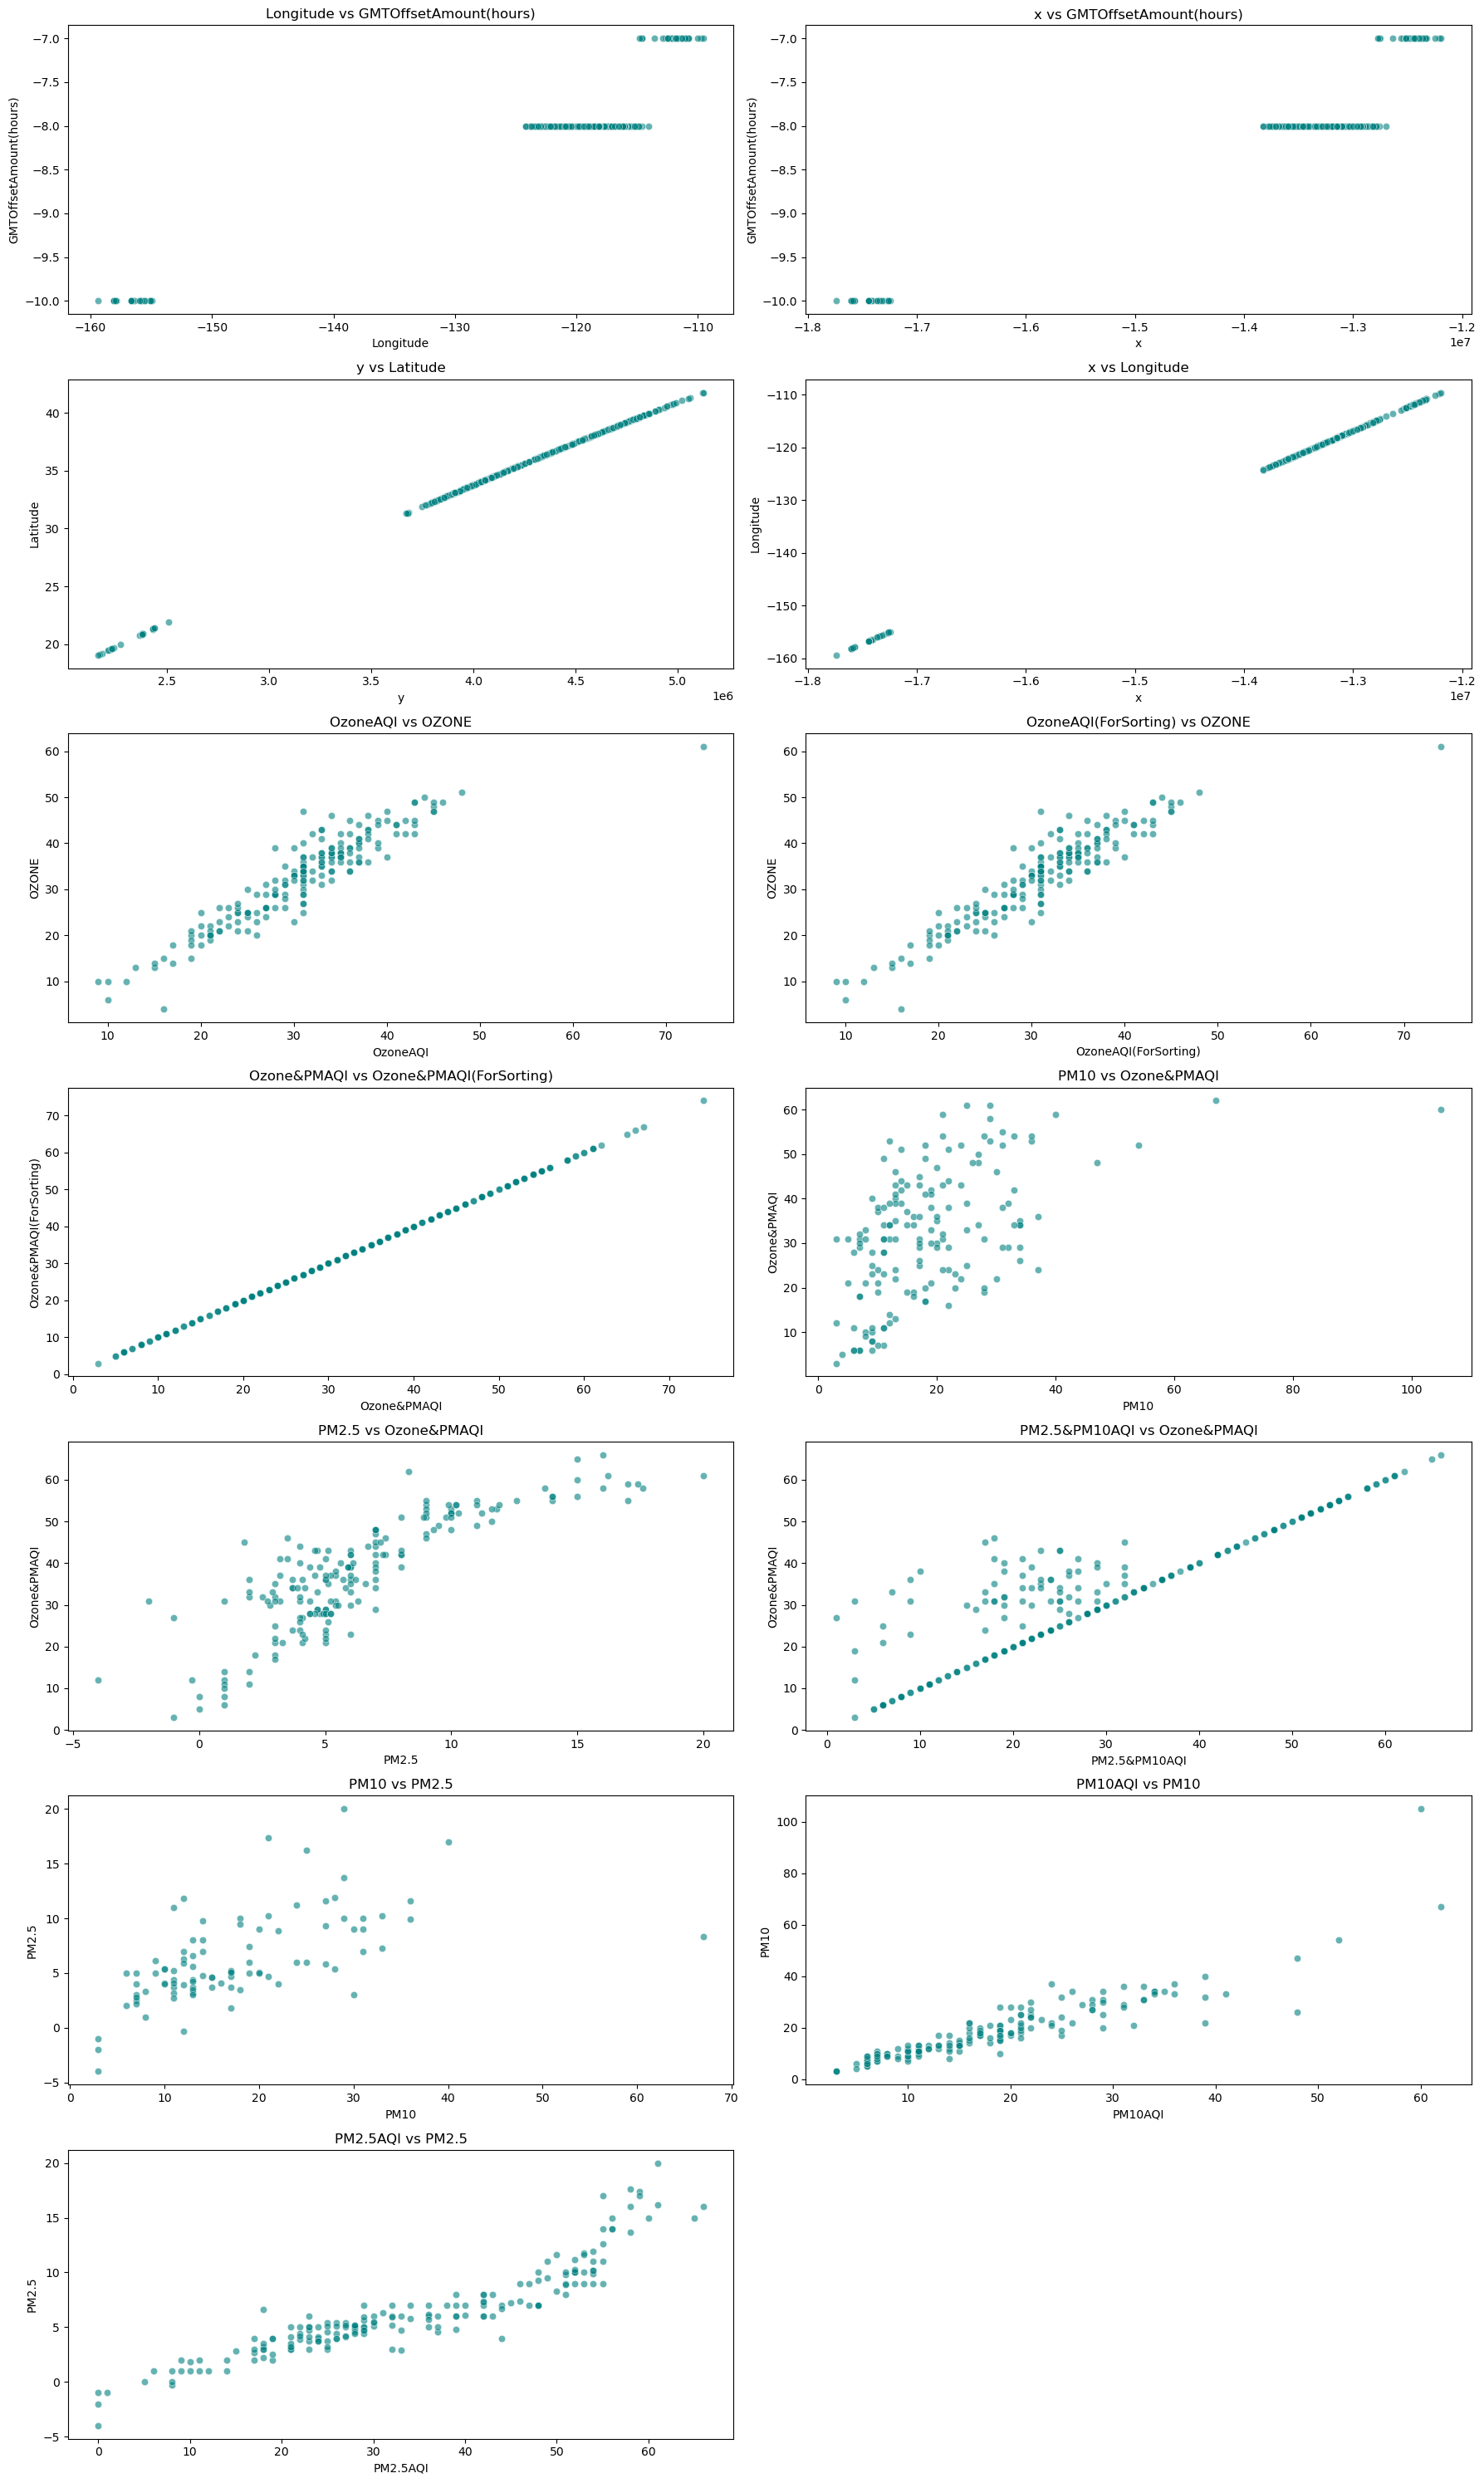

In [26]:
# Defining column pairs with high multicollinearity (Correlation > 0.8)
pairs_to_plot = [
    ('Longitude', 'GMTOffsetAmount(hours)'),
    ('x', 'GMTOffsetAmount(hours)'),
    ('y', 'Latitude'),
    ('x', 'Longitude'),
    ('OzoneAQI', 'OZONE'),
    ('OzoneAQI(ForSorting)','OZONE'),
    ('Ozone&PMAQI','Ozone&PMAQI(ForSorting)'),
    ('PM10', 'Ozone&PMAQI'),
    ('PM2.5', 'Ozone&PMAQI'),
    ('PM2.5&PM10AQI', 'Ozone&PMAQI'),
    ('PM10', 'PM2.5'),
    ('PM10AQI', 'PM10'),
    ('PM2.5AQI', 'PM2.5')
]

# Plotting scatter plots for the pairs
plt.figure(figsize=(18, 30))
for i, (x, y) in enumerate(pairs_to_plot, 1):
    plt.subplot(7, 2, i)
    if x in df.columns and y in df.columns:
        sns.scatterplot(data=df, x=x, y=y, color='teal', alpha=0.6)
        plt.title(f'{x} vs {y}')
        plt.xlabel(x)
        plt.ylabel(y)
    else:
        plt.text(0.5, 0.5, f'{x} or {y} not found in dataset',
                 fontsize=12, ha='center')

plt.tight_layout()
plt.show()

### Columns with High Correlation with Target Column

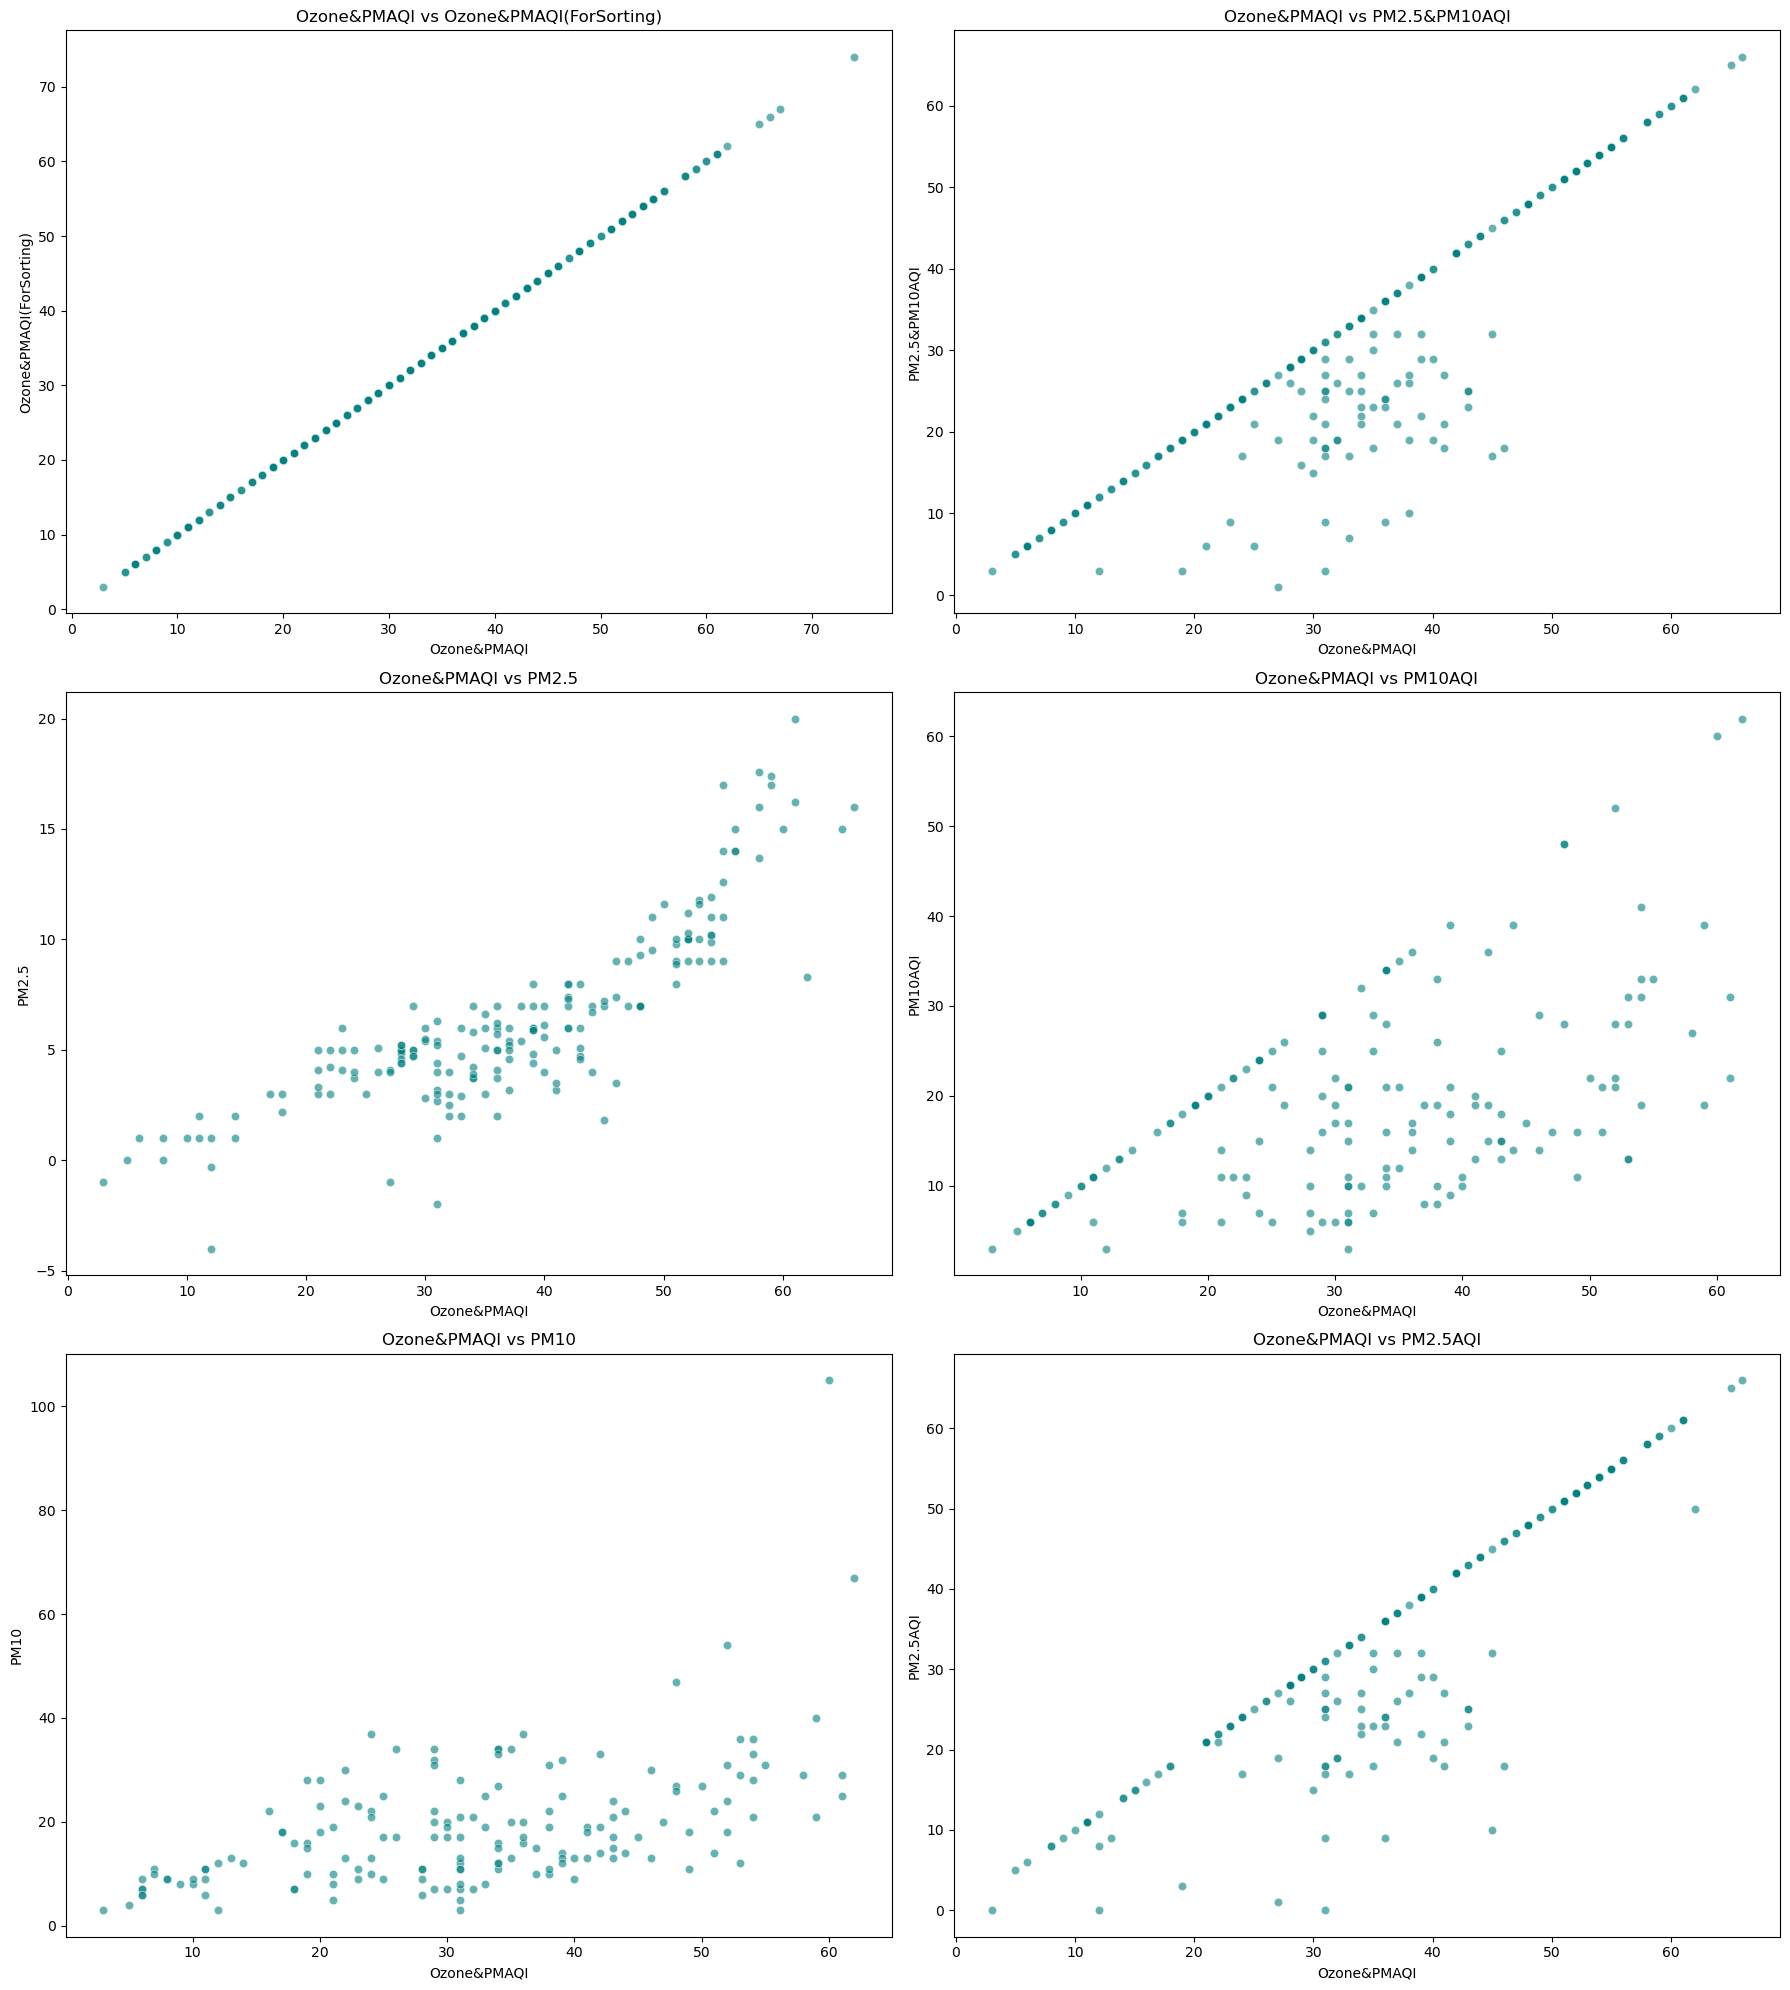

In [27]:
# Defining column pairs with high correlation with the target ('Ozone & PM AQI')
high_corr_pairs = [
    ('Ozone&PMAQI', 'Ozone&PMAQI(ForSorting)'),
    ('Ozone&PMAQI', 'PM2.5&PM10AQI'),
    ('Ozone&PMAQI', 'PM2.5'),
    ('Ozone&PMAQI', 'PM10AQI'),
    ('Ozone&PMAQI', 'PM10'),
    ('Ozone&PMAQI', 'PM2.5AQI')
]

# Plotting scatter plots for the high correlation pairs with the target column
plt.figure(figsize=(18, 20))
for i, (x, y) in enumerate(high_corr_pairs, 1):
    plt.subplot(3, 2, i)
    if x in df.columns and y in df.columns:
        sns.scatterplot(data=df, x=x, y=y, color='teal', alpha=0.6)
        plt.title(f'{x} vs {y}')
        plt.xlabel(x)
        plt.ylabel(y)
    else:
        plt.text(0.5, 0.5, f'{x} or {y} not found in dataset',
                 fontsize=12, ha='center')

plt.tight_layout()
plt.show()

## Understanding Air Quality Index (AQI) Categories and Health Impacts

#### The AQI is a scale from 0 to 500 that shows how clean or polluted the air is and what health risks it poses:

#### 0–50 (Good) – Safe for everyone

#### 51–100 (Moderate) – Generally okay, may affect very sensitive individuals

#### 101–150 (Unhealthy for Sensitive Groups) – Risk to children, elderly, and those with lung/heart issues

#### 151–200 (Unhealthy) – Everyone may start experiencing effects

#### 201–300 (Very Unhealthy) – Serious health effects likely for all

#### 301–500 (Hazardous) – Emergency health warnings; widespread impact

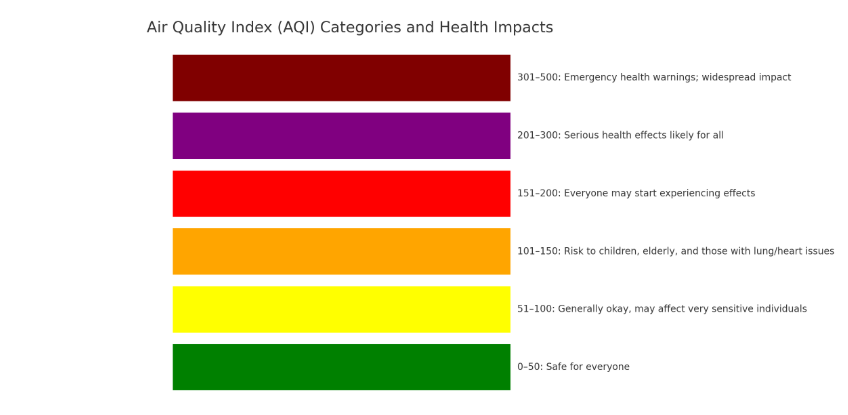

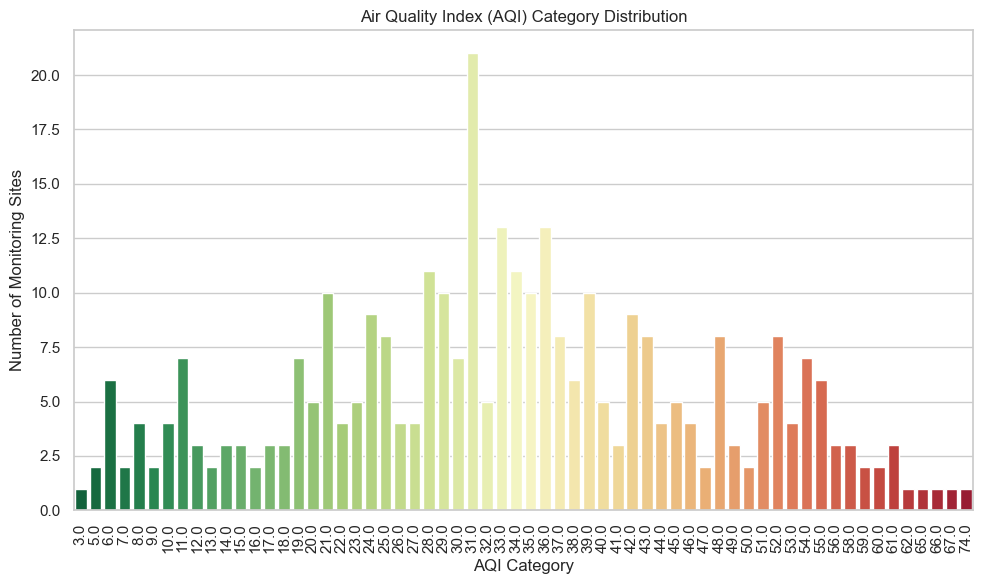

In [28]:
# Set the plot style
sns.set(style="whitegrid")

# Count the frequency of each AQI category
aqi_category_counts = df["Ozone&PMAQI"].value_counts().sort_index()

# Create a bar plot of AQI categories
plt.figure(figsize=(10, 6))
sns.barplot(x=aqi_category_counts.index, y=aqi_category_counts.values, palette="RdYlGn_r")
plt.title("Air Quality Index (AQI) Category Distribution")
plt.xlabel("AQI Category")
plt.ylabel("Number of Monitoring Sites")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### All monitoring stations in this dataset report AQI values within the "Good" (0–50) and "Moderate" (51–100) ranges.

#### There are no AQI values that fall into the higher risk categories like "Unhealthy for Sensitive Groups" (101–150) or worse.

#### This suggests that, at the time of data collection, air quality across all reported locations was relatively safe for the general population.

#### Even sensitive groups (like children, elderly, or people with asthma) may begin to experience health effects when the AQI exceeds 50.



## Data Preprocessing

In [29]:
df.shape

(500, 42)

### 1.Handling columns

#### 1.Remove unnecessary columns

In [30]:
# List of columns with only one unique value (to be removed)
single_value_columns = [
    'CountryCode', 'EPARegion',
    'OzoneUnitofMeasure', 'PM10UnitofMeasure',
    'PM2.5UnitofMeasure', 'ValidTime'
]

# List of ID columns (used only for identification)
id_columns = [
    'EPAAQSID', 'ObjectId'
]

# List of columns to drop (Labeling and Sorting Columns)
columns_to_drop_duplicates = [
    'Ozone&PMAQI(ForLabeling)', 'Ozone&PMAQI(ForSorting)',
    'OzoneAQI(ForLabeling)', 'OzoneAQI(ForSorting)',
    'PM10AQI(ForLabeling)', 'PM10AQI(ForSorting)',
    'PM2.5AQI(ForLabeling)', 'PM2.5AQI(ForSorting)',
    'PM2.5&PM10AQI(ForLabeling)', 'PM2.5&PM10AQI(ForSorting)'
]


# Dropping the unnecessary columns
df.drop(columns=single_value_columns + id_columns + columns_to_drop_duplicates, inplace=True, errors='ignore')






#### 1.If a column has only one unique value, it provides no useful information for prediction or analysis.
##### CountryCode
##### EPARegion
##### OzoneUnitofMeasure
##### PM10UnitofMeasure
##### PM2.5UnitofMeasure
##### ValidTime

#### 2.ID columns used only for identification. They don’t help in prediction, so they should be dropped.
##### EPAAQSID
##### ObjectId

#### 3.We are going to remove columns containing duplicate data with different labels, such as "ForLabeling" and "ForSorting". These columns provide identical values in different formats, which are redundant for analysis. By retaining only the main columns, we will ensure a cleaner and more efficient dataset for analysis and modeling.
##### 'Ozone&PMAQI(ForLabeling)', 'Ozone&PMAQI(ForSorting)',
##### 'OzoneAQI(ForLabeling)', 'OzoneAQI(ForSorting)',
##### 'PM10AQI(ForLabeling)', 'PM10AQI(ForSorting)',
##### 'PM2.5AQI(ForLabeling)', 'PM2.5AQI(ForSorting)',
##### 'PM2.5&PM10AQI(ForLabeling)', 'PM2.5&PM10AQI(ForSorting



#### 1.If a column has only one unique value, it provides no useful information for prediction or analysis.
##### CountryCode
##### EPARegion
##### OzoneUnitofMeasure
##### PM10UnitofMeasure
##### PM2.5UnitofMeasure
##### ValidTime

#### 2.ID columns used only for identification. They don’t help in prediction, so they should be dropped.
##### EPAAQSID
##### ObjectId

#### 3.We are going to remove columns containing duplicate data with different labels, such as "ForLabeling" and "ForSorting". These columns provide identical values in different formats, which are redundant for analysis. By retaining only the main columns, we will ensure a cleaner and more efficient dataset for analysis and modeling.
##### 'Ozone&PMAQI(ForLabeling)', 'Ozone&PMAQI(ForSorting)',
##### 'OzoneAQI(ForLabeling)', 'OzoneAQI(ForSorting)',
##### 'PM10AQI(ForLabeling)', 'PM10AQI(ForSorting)',
##### 'PM2.5AQI(ForLabeling)', 'PM2.5AQI(ForSorting)',
##### 'PM2.5&PM10AQI(ForLabeling)', 'PM2.5&PM10AQI(ForSorting


#### 2.Columns with multicollinearity

In [31]:

# columns_to_drop_multicollinearity= 'GMTOffsetAmount(hours)', 'y', 'x', 'OzoneAQI(ForSorting)', 'Ozone&PMAQI(ForSorting)',  'PM2.5(ForSorting)', 'PM2.5&PM10AQI(ForSorting)', 'PM10AQI(ForSorting)'
# List of columns to drop (to avoid multicollinearity)
columns_to_drop_multicollinearity = ['GMTOffsetAmount(hours)', 'y', 'x']

# Dropping the specified columns
df.drop(columns=columns_to_drop_multicollinearity, inplace=True, errors='ignore')

### 2.Handling missing values

### 1.missing values in the target column

##### Since ‘Ozone & PM AQI’ is the target variable, we do not perform missing value or outlier treatment on it, as such modifications could distort the model’s learning. Therefore, any rows with missing values in the target column are removed from the dataset.

In [32]:
# Dropping rows with null values in the target column 'Ozone & PM AQI'
df.dropna(subset=['Ozone&PMAQI'], inplace=True)

##### Ozone & PM AQI' is the target variable. rows with missing values in the target column are removed from the dataset¶

In [33]:
# Percentage of missing values in each column
df.isnull().sum()/df.shape[0]*100

DataSource                0.000000
Elevation                 0.000000
Latitude                  0.000000
LocalTimeatMonitor        0.000000
Longitude                 0.000000
OZONE                    42.249240
Ozone&PMAQI               0.000000
OzoneAQI                 37.386018
OzoneMeasuredatSite       0.000000
PM10                     51.367781
PM10AQI                  50.759878
PM10MeasuredatSite        0.000000
PM2.5                    44.072948
PM2.5AQI                 38.905775
PM2.5MeasuredatSite       0.000000
PM2.5&PM10AQI            18.541033
ReportingArea(s)         19.756839
SiteName                  0.000000
StateName                 0.911854
SiteOperationalStatus     0.000000
MonitorType               0.000000
dtype: float64

### 2.columns have more than 50% missing values

In [34]:
# List of columns have missing values
columns_missing = [ 'PM10', 'PM10AQI']


# Dropping those columns
df.drop(columns=columns_missing, inplace=True, errors='ignore')


#### percentage of missing values is greater than 50%, we can drop that columns.
###### PM10
###### PM10AQI

### 3.missing value in  Categorical Columns & Numerical Columns

In [35]:
df.isnull().sum()

DataSource                 0
Elevation                  0
Latitude                   0
LocalTimeatMonitor         0
Longitude                  0
OZONE                    139
Ozone&PMAQI                0
OzoneAQI                 123
OzoneMeasuredatSite        0
PM10MeasuredatSite         0
PM2.5                    145
PM2.5AQI                 128
PM2.5MeasuredatSite        0
PM2.5&PM10AQI             61
ReportingArea(s)          65
SiteName                   0
StateName                  3
SiteOperationalStatus      0
MonitorType                0
dtype: int64

In [36]:
# Imputer for Numerical Columns (using Mean)
num_imputer = SimpleImputer(strategy='mean')
for col in df.select_dtypes(include='number').columns:
    df[col] = num_imputer.fit_transform(df[[col]])

In [37]:
# Imputer for Categorical Columns (using Most Frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
for col in df.select_dtypes(include='object').columns:
    df[col] = cat_imputer.fit_transform(df[[col]])


##### For the missing value treatment we can use mean, median, mode or KNNimputer. KNNImputer is a method used for imputing missing values by using the k-nearest neighbors approach.





In [38]:
df.isnull().sum()

DataSource               0
Elevation                0
Latitude                 0
LocalTimeatMonitor       0
Longitude                0
OZONE                    0
Ozone&PMAQI              0
OzoneAQI                 0
OzoneMeasuredatSite      0
PM10MeasuredatSite       0
PM2.5                    0
PM2.5AQI                 0
PM2.5MeasuredatSite      0
PM2.5&PM10AQI            0
ReportingArea(s)         0
SiteName                 0
StateName                0
SiteOperationalStatus    0
MonitorType              0
dtype: int64

### 3.Columns  with  outlier

Index(['Elevation', 'Latitude', 'Longitude', 'OZONE', 'Ozone&PMAQI',
       'OzoneAQI', 'OzoneMeasuredatSite', 'PM10MeasuredatSite', 'PM2.5',
       'PM2.5AQI', 'PM2.5MeasuredatSite', 'PM2.5&PM10AQI'],
      dtype='object')


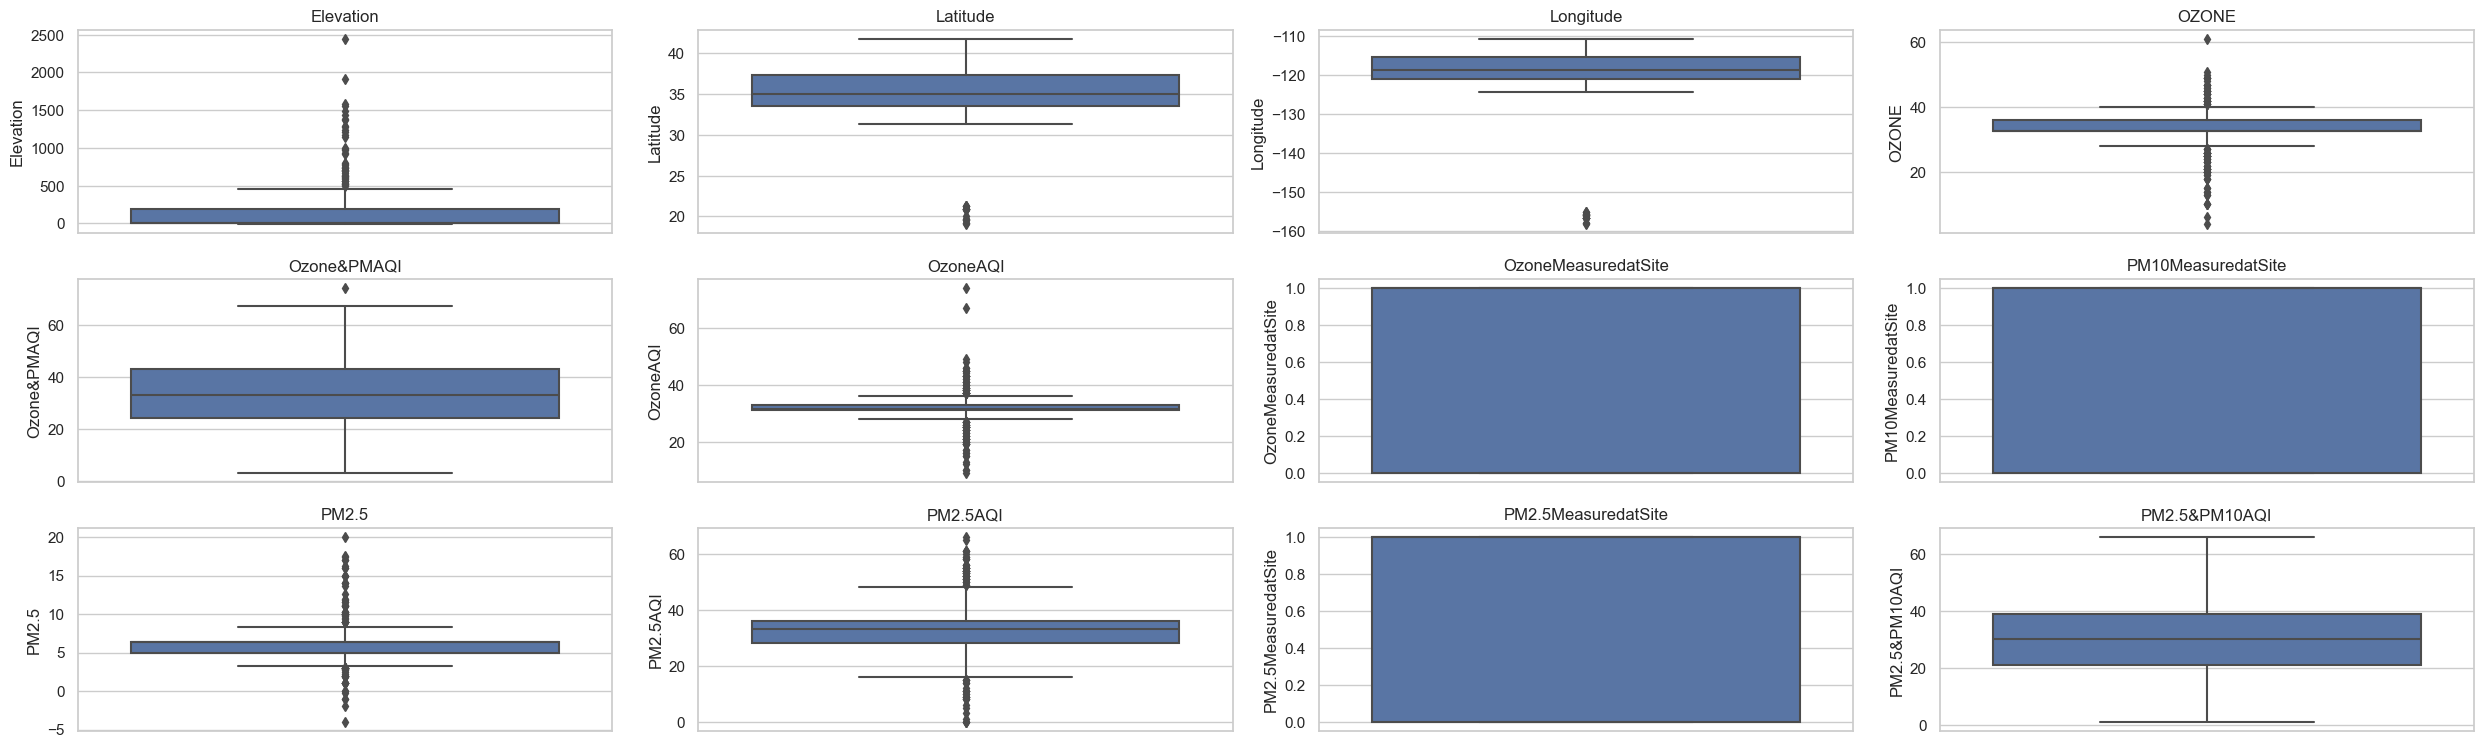

In [39]:
# Selecting and printing numerical columns
num_cols = df.select_dtypes(include='number').columns
print(num_cols)

#box plot to identify outliers
plt.figure(figsize=(25, 25))
#enumerate() is a built-in Python function that allows you to loop over an iterable (like a list) and have an automatic counter.
for i, col in enumerate(num_cols):
    plt.subplot(10, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

##### Here IQR method is used for outlier treatment

In [40]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [41]:
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

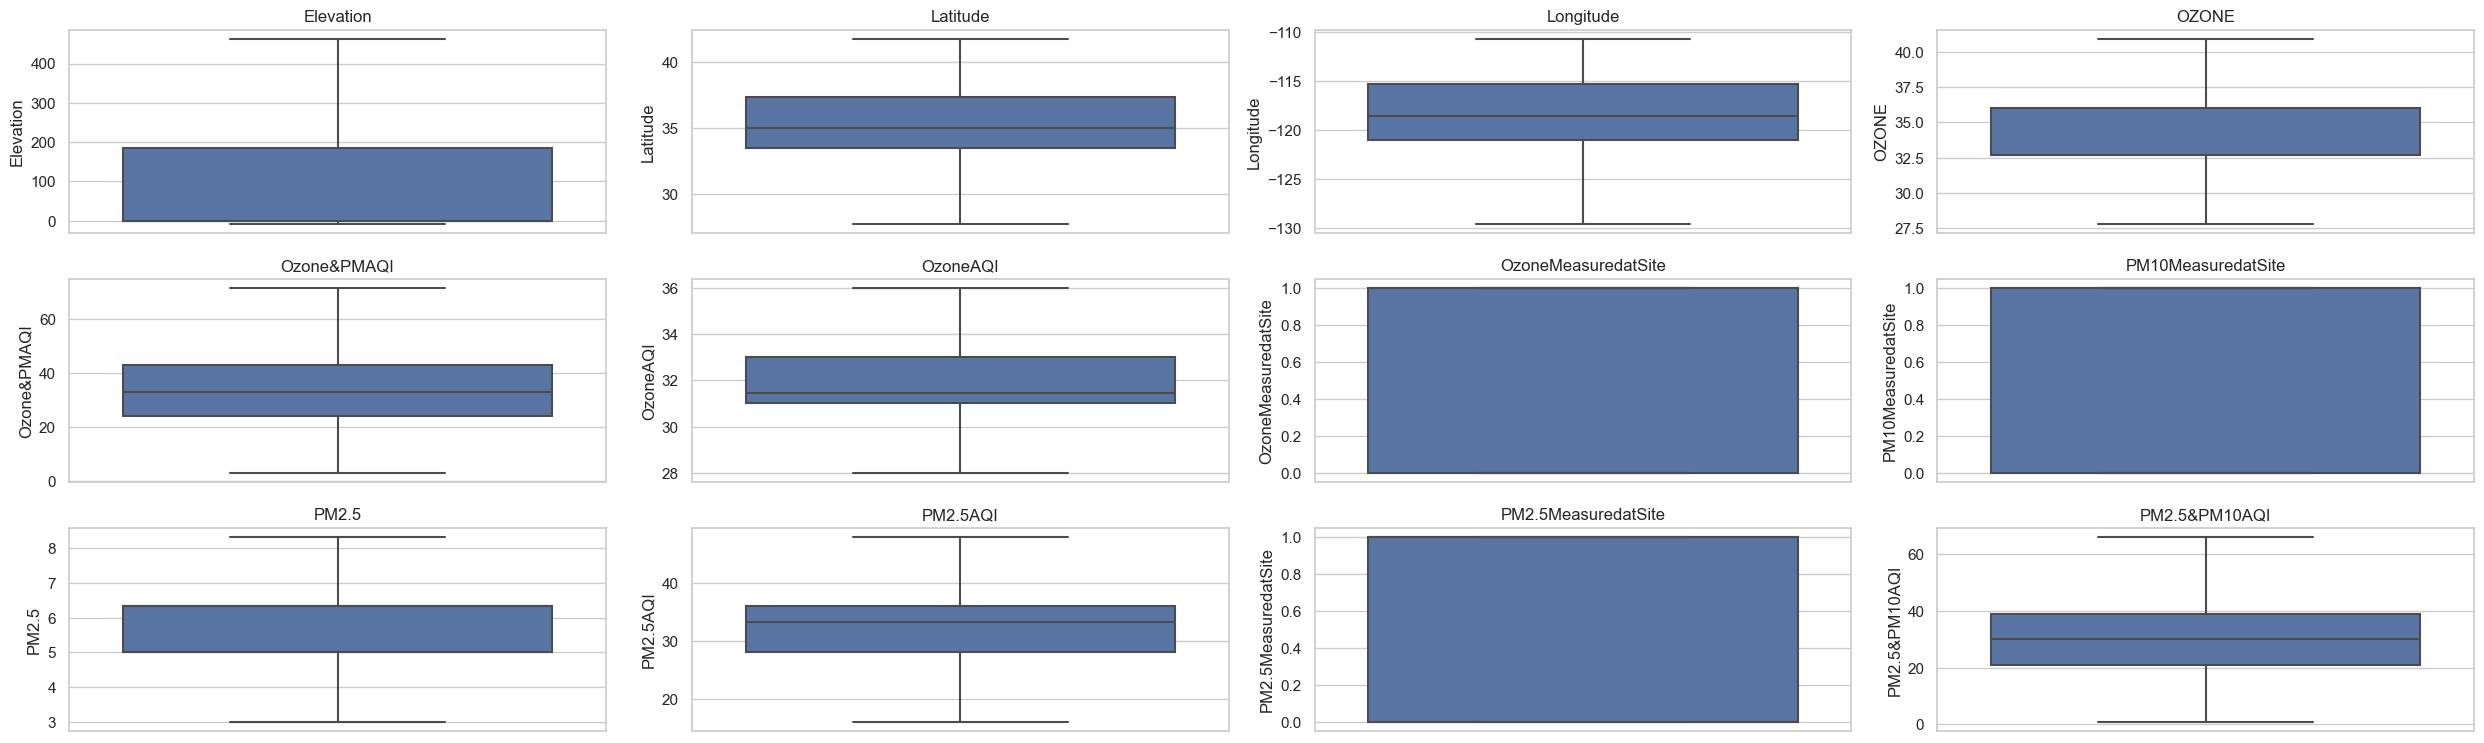

In [42]:
#box plot after outlier treatment
plt.figure(figsize=(25, 25))
#enumerate() is a built-in Python function that allows you to loop over an iterable (like a list) and have an automatic counter.
for i, col in enumerate(num_cols):
    plt.subplot(10, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

###### Check the skewness and kurtosis after outlier treatment

In [43]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurt = df[num_cols].apply(lambda x: kurtosis(x, fisher=False))

print(skewness)
print(kurt)

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

Elevation              1.226058
Latitude              -0.443693
Longitude             -0.327434
OZONE                  0.446872
Ozone&PMAQI            0.062603
OzoneAQI               0.253321
OzoneMeasuredatSite   -0.561987
PM10MeasuredatSite    -0.018238
PM2.5                 -0.439261
PM2.5AQI              -0.008944
PM2.5MeasuredatSite   -0.494717
PM2.5&PM10AQI          0.342419
dtype: float64
Elevation              2.784476
Latitude               3.503719
Longitude              3.203971
OZONE                  2.483971
Ozone&PMAQI            2.548218
OzoneAQI               2.184915
OzoneMeasuredatSite    1.315829
PM10MeasuredatSite     1.000333
PM2.5                  2.676246
PM2.5AQI               2.407820
PM2.5MeasuredatSite    1.244745
PM2.5&PM10AQI          2.572151
dtype: float64
Variables with positive skewness (skew > 1):
 Elevation    1.226058
dtype: float64
Variables with negative skewness (skew < -1):
 Series([], dtype: float64)
Variables with platykurtic distribution (kurt

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DataSource             329 non-null    object 
 1   Elevation              329 non-null    float64
 2   Latitude               329 non-null    float64
 3   LocalTimeatMonitor     329 non-null    object 
 4   Longitude              329 non-null    float64
 5   OZONE                  329 non-null    float64
 6   Ozone&PMAQI            329 non-null    float64
 7   OzoneAQI               329 non-null    float64
 8   OzoneMeasuredatSite    329 non-null    float64
 9   PM10MeasuredatSite     329 non-null    float64
 10  PM2.5                  329 non-null    float64
 11  PM2.5AQI               329 non-null    float64
 12  PM2.5MeasuredatSite    329 non-null    float64
 13  PM2.5&PM10AQI          329 non-null    float64
 14  ReportingArea(s)       329 non-null    object 
 15  SiteNa

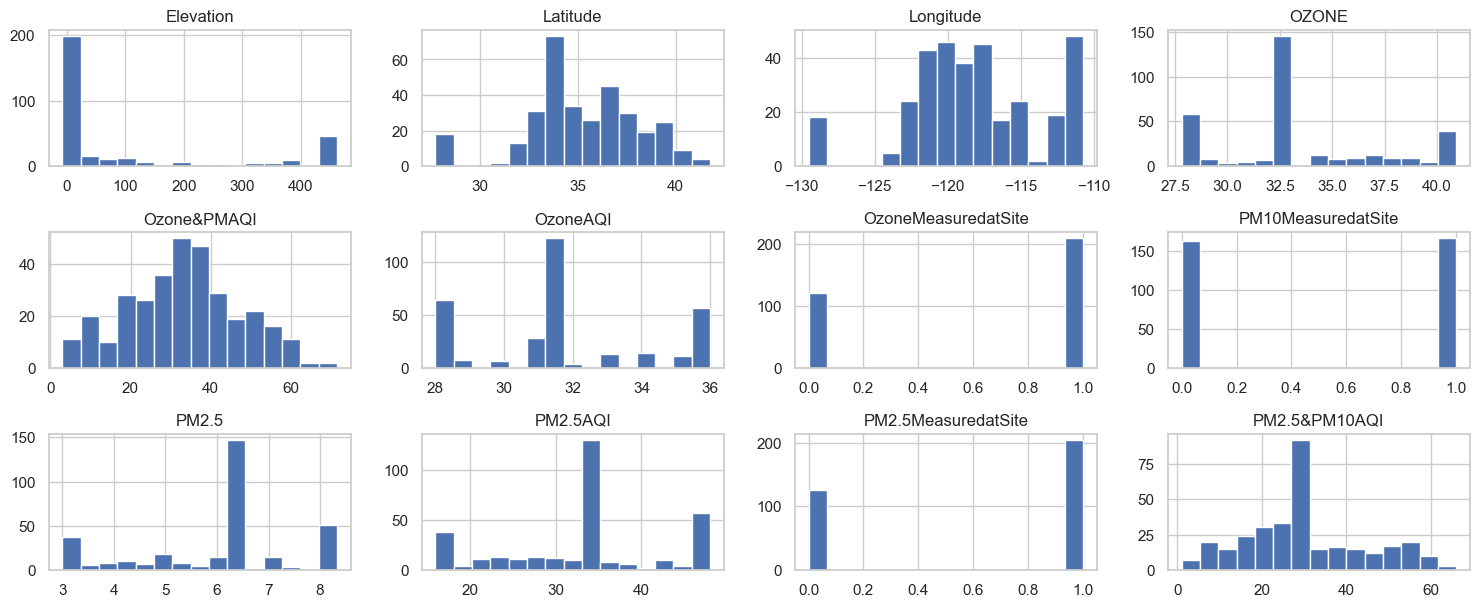

In [45]:
# Histograms for numerical columns after outlier treatment
df[num_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

## Visualization

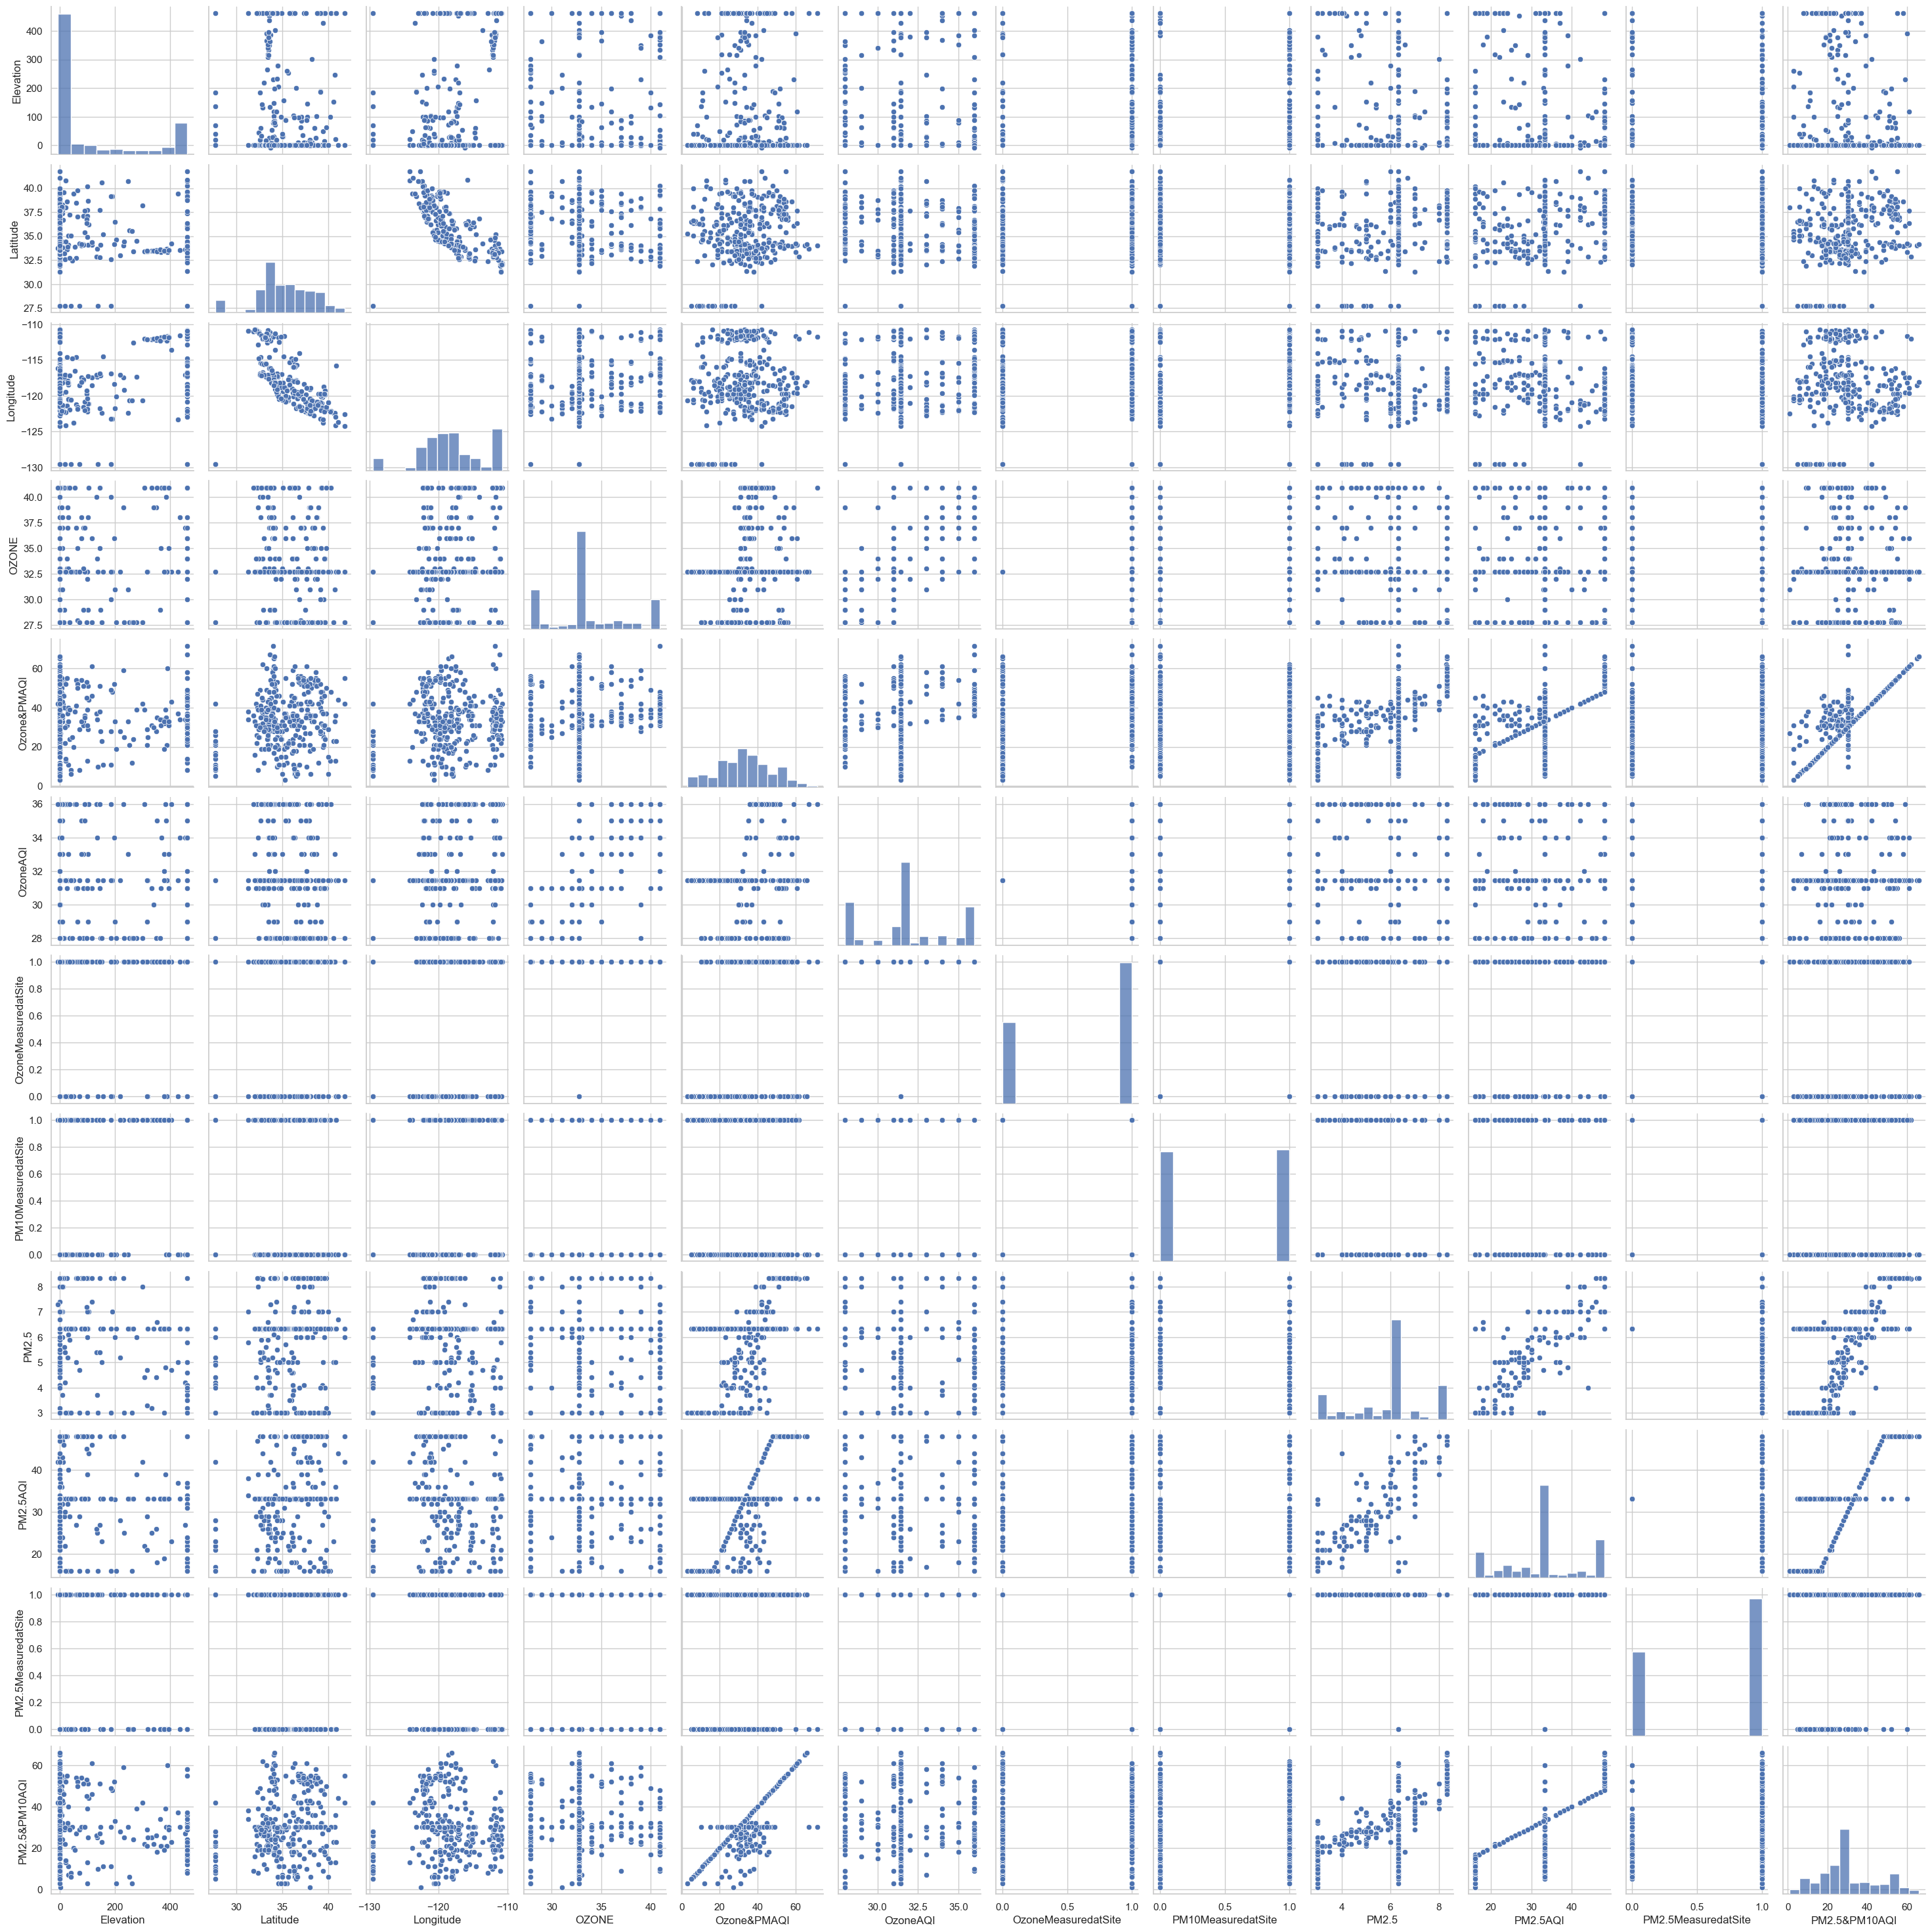

In [46]:
#Pair plot - To visualize relationships between multiple pairs of variables.
sns.pairplot(df)
plt.show()

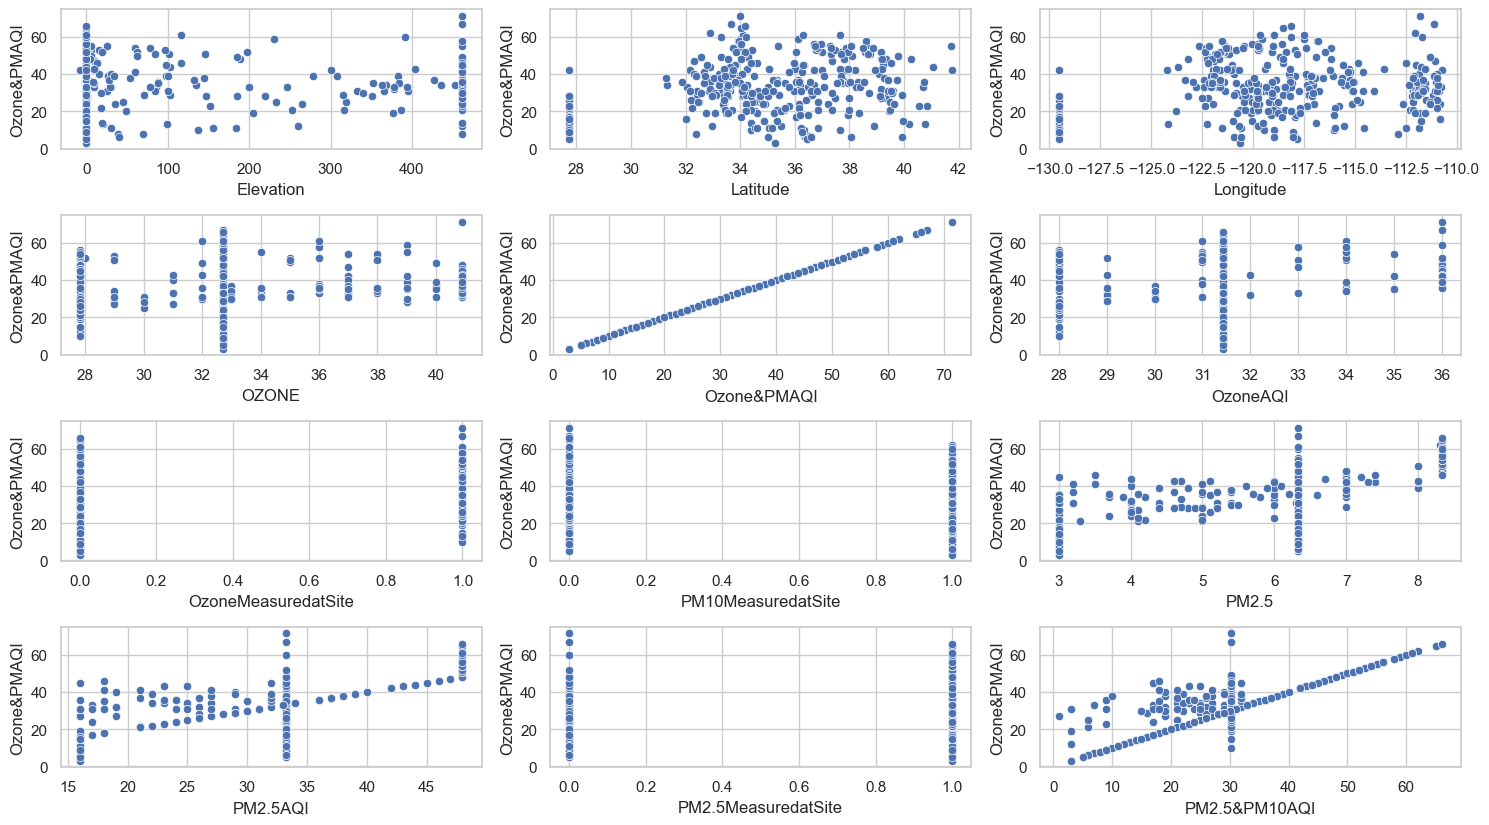

In [47]:
# scatter plot to identify the relationship between dependent ('Ozone&PMAQI') and independent features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(data=df,x=col,y='Ozone&PMAQI')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

<Axes: >

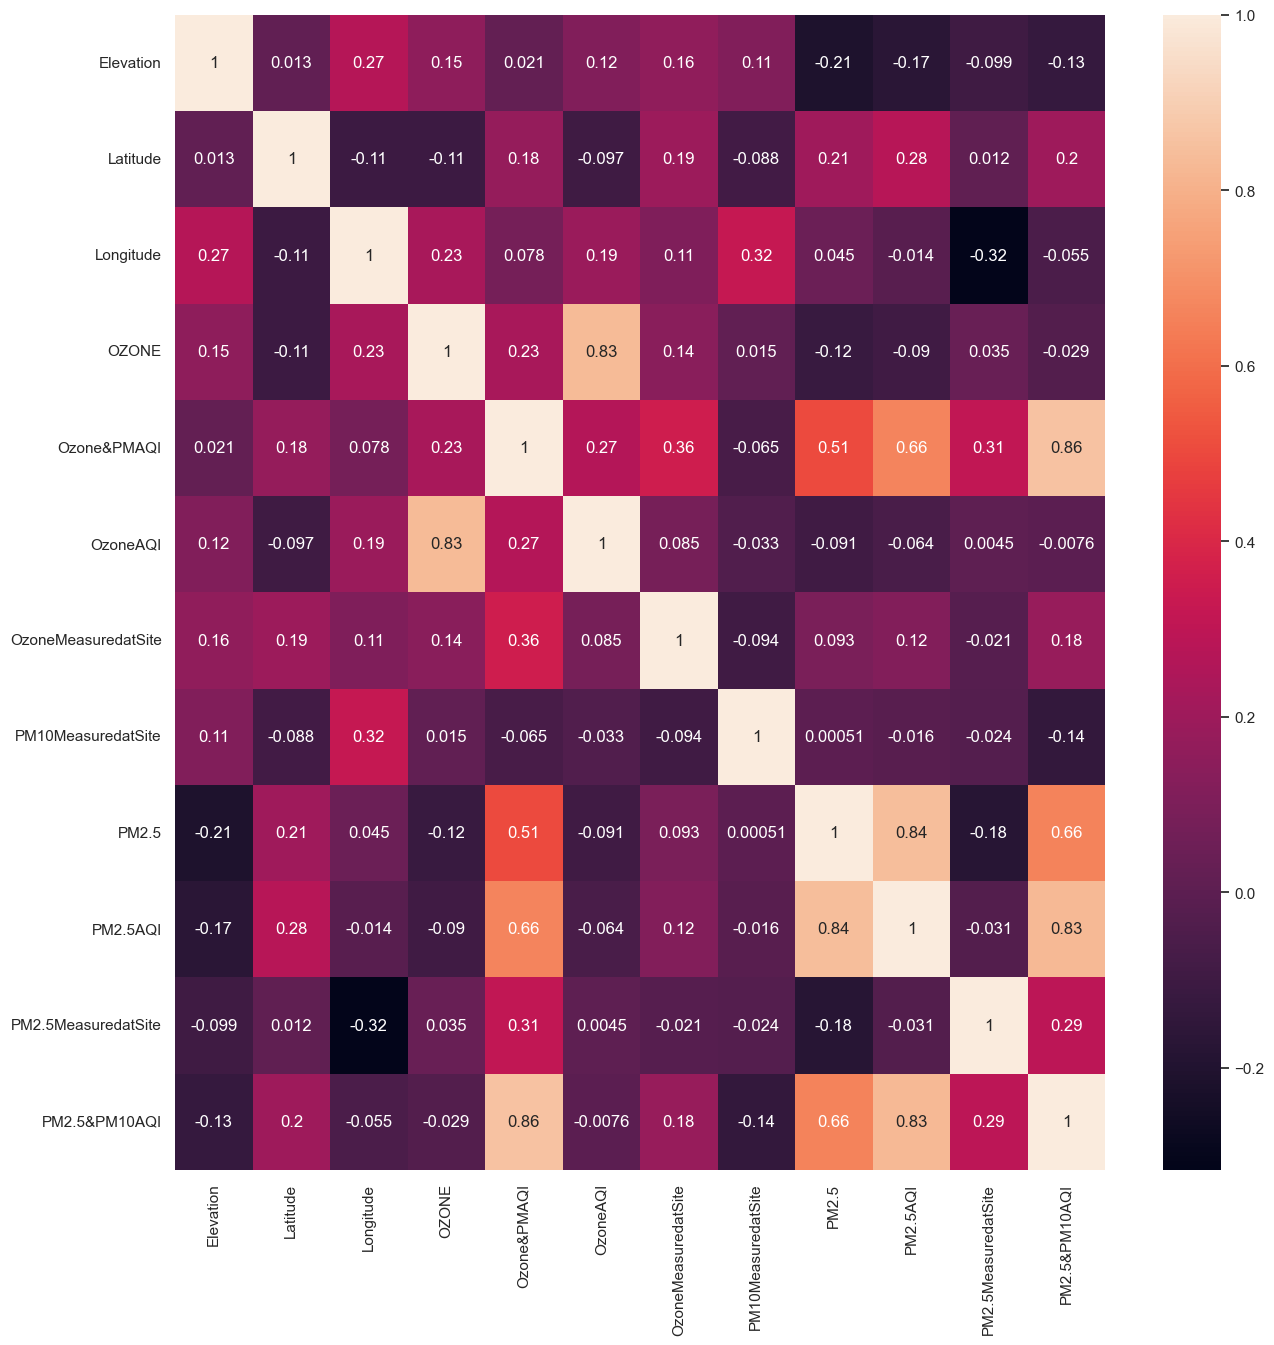

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(df[num_cols].corr(),annot=True)

## Feature Engineering

#### Encode categorical features to numerical using techniques like one-hot encoding or label encoding to prepare the data for machine learning algorithms. Use Label encoding for ordinal data and one-hot encoding for nominal data.

### Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder

# Identifying all categorical columns (excluding numeric columns)
cat_cols = df.select_dtypes(include=['object']).columns

# Applying Label Encoding to all categorical columns
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Displaying the first few rows to verify the encoding
print("Label Encoding applied to all categorical columns:")
print(df.head())


Label Encoding applied to all categorical columns:
   DataSource  Elevation   Latitude  LocalTimeatMonitor   Longitude  \
0          12      189.1  39.150478                   1 -123.206528   
2          12       48.5  39.437340                   1 -123.787660   
5           8        0.0  37.645718                   1 -118.966515   
6           8        0.0  37.962069                   1 -119.120278   
7           8        0.0  38.069700                   1 -118.947700   

       OZONE  Ozone&PMAQI   OzoneAQI  OzoneMeasuredatSite  PM10MeasuredatSite  \
0  32.726316         48.0  31.436893                  0.0                 0.0   
2  32.726316         20.0  31.436893                  0.0                 1.0   
5  32.726316         10.0  31.436893                  0.0                 1.0   
6  32.726316         18.0  31.436893                  0.0                 1.0   
7  32.726316          6.0  31.436893                  0.0                 1.0   

      PM2.5   PM2.5AQI  PM2.5Measur

In [50]:
df.head()

DataSource  Elevation   Latitude  LocalTimeatMonitor   Longitude  \
0          12      189.1  39.150478                   1 -123.206528   
2          12       48.5  39.437340                   1 -123.787660   
5           8        0.0  37.645718                   1 -118.966515   
6           8        0.0  37.962069                   1 -119.120278   
7           8        0.0  38.069700                   1 -118.947700   

       OZONE  Ozone&PMAQI   OzoneAQI  OzoneMeasuredatSite  PM10MeasuredatSite  \
0  32.726316         48.0  31.436893                  0.0                 0.0   
2  32.726316         20.0  31.436893                  0.0                 1.0   
5  32.726316         10.0  31.436893                  0.0                 1.0   
6  32.726316         18.0  31.436893                  0.0                 1.0   
7  32.726316          6.0  31.436893                  0.0                 1.0   

      PM2.5   PM2.5AQI  PM2.5MeasuredatSite  PM2.5&PM10AQI  ReportingArea(s)  \
0  7.000000  48.000000                  1.0           48.0               154   
2  6.331522  33.233831                  0.0           20.0                35   
5  6.331522  33.233831                  0.0           10.0                74   
6  3.002717  18.000000                  1.0           18.0                84   
7  6.331522  33.233831                  0.0            6.0                83   

   SiteName  StateName  SiteOperationalStatus  MonitorType  
0       309          1                      0            0  
2        93          1                      0            0  
5       173          1                      0            0  
6       151          1                      0            0  
7       187          1                      0            0

In [51]:
# Splitting the DataFrame into Features (X) and Target (y)
X=df.drop('Ozone&PMAQI',axis=1)
y=df[['Ozone&PMAQI']]

In [52]:
X.head()

DataSource  Elevation   Latitude  LocalTimeatMonitor   Longitude  \
0          12      189.1  39.150478                   1 -123.206528   
2          12       48.5  39.437340                   1 -123.787660   
5           8        0.0  37.645718                   1 -118.966515   
6           8        0.0  37.962069                   1 -119.120278   
7           8        0.0  38.069700                   1 -118.947700   

       OZONE   OzoneAQI  OzoneMeasuredatSite  PM10MeasuredatSite     PM2.5  \
0  32.726316  31.436893                  0.0                 0.0  7.000000   
2  32.726316  31.436893                  0.0                 1.0  6.331522   
5  32.726316  31.436893                  0.0                 1.0  6.331522   
6  32.726316  31.436893                  0.0                 1.0  3.002717   
7  32.726316  31.436893                  0.0                 1.0  6.331522   

    PM2.5AQI  PM2.5MeasuredatSite  PM2.5&PM10AQI  ReportingArea(s)  SiteName  \
0  48.000000                  1.0           48.0               154       309   
2  33.233831                  0.0           20.0                35        93   
5  33.233831                  0.0           10.0                74       173   
6  18.000000                  1.0           18.0                84       151   
7  33.233831                  0.0            6.0                83       187   

   StateName  SiteOperationalStatus  MonitorType  
0          1                      0            0  
2          1                      0            0  
5          1                      0            0  
6          1                      0            0  
7          1                      0            0

In [53]:
X.shape

(329, 18)

In [54]:
y.shape

(329, 1)

### Feature Scaling

##### Scale numerical features to ensure that they have the same magnitude, preventing some features from dominating others during model training.

In [55]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Convert the result back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled

DataSource  Elevation  Latitude  LocalTimeatMonitor  Longitude    OZONE  \
0     -0.332698   0.445506  1.343165           -0.325749  -1.098090 -0.18215   
1     -0.332698  -0.367944  1.441759           -0.325749  -1.226413 -0.18215   
2     -0.696951  -0.648544  0.825979           -0.325749  -0.161827 -0.18215   
3     -0.696951  -0.648544  0.934709           -0.325749  -0.195780 -0.18215   
4     -0.696951  -0.648544  0.971701           -0.325749  -0.157672 -0.18215   
..          ...        ...       ...                 ...        ...      ...   
324    1.488563  -0.648544 -0.359614           -0.325749   0.018249 -0.18215   
325    1.488563  -0.648544 -0.412516           -0.325749  -0.070781 -0.18215   
326   -1.061203  -0.648544  1.618081           -0.325749  -0.604116 -0.18215   
327   -1.061203  -0.648544  1.614159           -0.325749  -0.592033 -0.18215   
328   -0.696951  -0.648544  0.826007           -0.325749  -0.161848 -0.18215   

     OzoneAQI  OzoneMeasuredatSite  PM10MeasuredatSite     PM2.5  PM2.5AQI  \
0   -0.111659            -1.319722           -1.009160  0.669830  1.600654   
1   -0.111659            -1.319722            0.990923  0.231839  0.040152   
2   -0.111659            -1.319722            0.990923  0.231839  0.040152   
3   -0.111659            -1.319722            0.990923 -1.949211 -1.569773   
4   -0.111659            -1.319722            0.990923  0.231839  0.040152   
..        ...                  ...                 ...       ...       ...   
324 -0.111659            -1.319722            0.990923  0.231839  0.040152   
325 -0.111659            -1.319722            0.990923  0.231839  0.040152   
326 -0.111659            -1.319722           -1.009160  0.231839 -1.781134   
327 -0.111659            -1.319722           -1.009160  0.669830 -0.407283   
328 -0.111659            -1.319722           -1.009160  0.231839  1.600654   

     PM2.5MeasuredatSite  PM2.5&PM10AQI  ReportingArea(s)  SiteName  \
0               0.782780       1.243251          1.464360  1.526739   
1              -1.277498      -0.708906         -1.385101 -0.747576   
2              -1.277498      -1.406105         -0.451244  0.094763   
3               0.782780      -0.848345         -0.211794 -0.136880   
4              -1.277498      -1.684984         -0.235739  0.242172   
..                   ...            ...               ...       ...   
324            -1.277498      -0.708906          0.362888 -1.000277   
325            -1.277498      -0.918065          0.362888 -0.989748   
326             0.782780      -1.057505          0.362888  0.010529   
327             0.782780      -0.081427          0.362888  0.021058   
328             0.782780       2.149610         -0.451244  0.484345   

     StateName  SiteOperationalStatus  MonitorType  
0    -0.294460                    0.0    -0.304997  
1    -0.294460                    0.0    -0.304997  
2    -0.294460                    0.0    -0.304997  
3    -0.294460                    0.0    -0.304997  
4    -0.294460                    0.0    -0.304997  
..         ...                    ...          ...  
324   1.119806                    0.0     3.278719  
325   1.119806                    0.0     3.278719  
326   1.119806                    0.0     3.278719  
327  -0.294460                    0.0     3.278719  
328   1.119806                    0.0     3.278719  

[329 rows x 18 columns]

## Data Splitting

In [56]:
#Splitting the dataset into 80-20, that is, 80% of the data is for training and 20% of the data is for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Training & Evaluation (Without feature Selection & Hyperparameter Tuning)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor(),
    
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

RMSE        MSE       MAE R2_Score
Model-Name                                                       
GradientBoostingRegressor  3.529351  12.456316  1.959564  93.58 %
RandomForestRegressor      4.216752  17.780994  2.163712  90.84 %
XGBRegressor               5.243881  27.498288  2.429784  85.83 %
LinearRegression           5.390421  29.056639  3.816703  85.03 %
ExtraTreeRegressor         5.635722  31.761364  2.250000  83.64 %
MLPRegressor               6.976070  48.665547  5.682960  74.93 %
DecisionTreeRegressor      7.817763  61.117424  3.265152  68.52 %
SVR                        8.177540  66.872168  6.113512  65.55 %

## Feature Selection

### 1.SelecKBbest¶

In [58]:
from sklearn.feature_selection import SelectKBest, f_regression

# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=10)
X_kbest = selector_kbest.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)

# Get the names of the selected features
selected_features_kbest = X_train.columns[selected_indices_kbest]

print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: Index(['DataSource', 'Latitude', 'LocalTimeatMonitor', 'OZONE', 'OzoneAQI',
       'OzoneMeasuredatSite', 'PM2.5', 'PM2.5AQI', 'PM2.5MeasuredatSite',
       'PM2.5&PM10AQI'],
      dtype='object')


In [59]:
X1 = X_scaled[['DataSource', 'Latitude', 'LocalTimeatMonitor', 'OZONE', 'OzoneAQI',
       'OzoneMeasuredatSite', 'PM2.5', 'PM2.5AQI', 'PM2.5MeasuredatSite',
       'PM2.5&PM10AQI']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor(),
    
]

# Train and evaluate each model
for model in models:
    model.fit(X1_train, y1_train)
    
    # Make predictions
    predictions = model.predict(X1_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y1_test, predictions, squared=False)
    mse = mean_squared_error(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    r2 = r2_score(y1_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

RMSE        MSE       MAE R2_Score
Model-Name                                                       
XGBRegressor               3.231362  10.441699  1.842533  94.62 %
RandomForestRegressor      3.356745  11.267738  1.653788  94.20 %
GradientBoostingRegressor  3.505932  12.291562  1.872722  93.67 %
DecisionTreeRegressor      4.407294  19.424242  1.909091  89.99 %
ExtraTreeRegressor         4.450060  19.803030  2.409091  89.80 %
LinearRegression           5.534452  30.630155  4.037445  84.22 %
SVR                        6.484231  42.045253  4.761945  78.34 %
MLPRegressor               7.227168  52.231958  5.961545  73.09 %

### 2. Recursive Feature Elimination (RFE) with Random Forest Regressor

In [60]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# RFE with Random Forest regressor
rfe_selector_regressor = RFE(estimator=rf_regressor, n_features_to_select=10, step=1)
X_rfe_regressor = rfe_selector_regressor.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_rfe_regressor = rfe_selector_regressor.get_support(indices=True)

# Get the names of the selected features
selected_features_rfe_regressor = X_train.columns[selected_indices_rfe_regressor]

print("Selected features using RFE with Random Forest Regressor:", selected_features_rfe_regressor)

Selected features using RFE with Random Forest Regressor: Index(['DataSource', 'Elevation', 'Longitude', 'OZONE', 'OzoneAQI',
       'OzoneMeasuredatSite', 'PM2.5AQI', 'PM2.5&PM10AQI', 'ReportingArea(s)',
       'SiteName'],
      dtype='object')


In [61]:
X1 = X_scaled[['DataSource', 'Elevation', 'Longitude', 'OZONE', 'OzoneAQI',
       'OzoneMeasuredatSite', 'PM2.5AQI', 'PM2.5&PM10AQI', 'ReportingArea(s)',
       'SiteName']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor(),
    
]

# Train and evaluate each model
for model in models:
    model.fit(X1_train, y1_train)
    
    # Make predictions
    predictions = model.predict(X1_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y1_test, predictions, squared=False)
    mse = mean_squared_error(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    r2 = r2_score(y1_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

RMSE        MSE       MAE R2_Score
Model-Name                                                       
GradientBoostingRegressor  3.213984  10.329691  1.897048  94.68 %
RandomForestRegressor      4.019027  16.152578  2.103333  91.68 %
LinearRegression           5.470936  29.931139  3.880529  84.58 %
XGBRegressor               5.735269  32.893306  2.571992  83.06 %
ExtraTreeRegressor         6.357112  40.412879  3.128788  79.18 %
DecisionTreeRegressor      6.838505  46.765152  2.696970  75.91 %
SVR                        6.991605  48.882546  5.338763  74.82 %
MLPRegressor               7.375849  54.403143  5.935234  71.98 %

### 3.Select From  Lasso (L1 Regularization)

In [62]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Lasso model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed

# SelectFromModel with Lasso
selector_lasso = SelectFromModel(lasso_model, max_features=10)
X_lasso = selector_lasso.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_lasso = selector_lasso.get_support(indices=True)

# Print selected feature names
selected_features_lasso = X_train.columns[selected_indices_lasso]
print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)

Selected features using SelectFromModel with Lasso: Index(['Elevation', 'Latitude', 'LocalTimeatMonitor', 'OzoneAQI',
       'OzoneMeasuredatSite', 'PM10MeasuredatSite', 'PM2.5MeasuredatSite',
       'PM2.5&PM10AQI', 'SiteName', 'MonitorType'],
      dtype='object')


In [63]:
X1 = X_scaled[['Elevation', 'Latitude', 'LocalTimeatMonitor', 'OzoneAQI',
       'OzoneMeasuredatSite', 'PM10MeasuredatSite', 'PM2.5MeasuredatSite',
       'PM2.5&PM10AQI', 'SiteName', 'MonitorType']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor(),
    
]

# Train and evaluate each model
for model in models:
    model.fit(X1_train, y1_train)
    
    # Make predictions
    predictions = model.predict(X1_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y1_test, predictions, squared=False)
    mse = mean_squared_error(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    r2 = r2_score(y1_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

RMSE        MSE       MAE R2_Score
Model-Name                                                       
XGBRegressor               2.771234   7.679736  1.758003  96.04 %
GradientBoostingRegressor  2.834708   8.035572  1.729126  95.86 %
RandomForestRegressor      2.879856   8.293568  1.733561  95.73 %
DecisionTreeRegressor      3.911909  15.303030  1.878788  92.12 %
ExtraTreeRegressor         4.206777  17.696970  1.818182  90.88 %
LinearRegression           5.237046  27.426651  3.733430  85.87 %
MLPRegressor               7.764231  60.283283  5.983581  68.95 %
SVR                        8.306045  68.990379  6.328148  64.46 %

## Hyperparameter Tuning

In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Parameter grid for XGBRegressor (optimized for faster execution)
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Initialize XGBRegressor
XGB_model = XGBRegressor(random_state=42)

# Grid search object
Grid_xgb = GridSearchCV(estimator=XGB_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fit the model on training data
Grid_xgb.fit(X_train, y_train)

# Get the best parameters
XGB_best_params = Grid_xgb.best_params_
print("Best parameters for XGBoost Regressor:", XGB_best_params)

# Predict on test data
y_pred_xgb = Grid_xgb.predict(X_test)

# Evaluate the model
print("\nModel Performance:")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost Regressor: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}

Model Performance:
R² Score: 0.9289237260818481
MSE: 13.797886929486111
RMSE: 3.7145507035826166
MAE: 2.1113387743631997


In [65]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Parameter grid for regression (optimized for faster tuning)
param_grid_gbr = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Gradient Boosting Regressor
GBR_model = GradientBoostingRegressor(random_state=42)

# Grid search object
Grid_gbr = GridSearchCV(estimator=GBR_model, param_grid=param_grid_gbr, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fitting the data
Grid_gbr.fit(X_train, y_train)

# Best parameters
GBR_best_params = Grid_gbr.best_params_
print("Best parameters for Gradient Boosting Regressor:", GBR_best_params)

# Prediction on test data
y_pred_gbr = Grid_gbr.predict(X_test)

# Evaluation metrics
print("\nModel Performance:")
print("R² Score:", r2_score(y_test, y_pred_gbr))
print("MSE:", mean_squared_error(y_test, y_pred_gbr))
print("RMSE:", mean_squared_error(y_test, y_pred_gbr, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}

Model Performance:
R² Score: 0.8613994232980065
MSE: 26.906234681202115
RMSE: 5.187122003693581
MAE: 2.430012200682597


##  Best model

In [66]:
#From  Lasso (L1 Regularization)
X1 = X_scaled[['Elevation', 'Latitude', 'LocalTimeatMonitor', 'OzoneAQI',
       'OzoneMeasuredatSite', 'PM10MeasuredatSite', 'PM2.5MeasuredatSite',
       'PM2.5&PM10AQI', 'SiteName', 'MonitorType']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)



In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Parameter grid for XGBRegressor (optimized for faster execution)
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Initialize XGBRegressor
XGB_model = XGBRegressor(random_state=42)

# Grid search object
Grid_xgb = GridSearchCV(estimator=XGB_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fit the model on training data
Grid_xgb.fit(X1_train, y1_train)

# Get the best parameters
XGB_best_params = Grid_xgb.best_params_
print("Best parameters for XGBoost Regressor:", XGB_best_params)

# Use the best fitted model
best_xgb_model = Grid_xgb.best_estimator_

# Training accuracy (R² Score)
train_r2 = best_xgb_model.score(X1_train, y1_train)
print("Training R² Score:", train_r2)

# Predict on test data
y1_pred_xgb = best_xgb_model.predict(X1_test)

# Evaluate the model
print("\nModel Performance on Test Set:")
print("R² Score:", r2_score(y1_test, y1_pred_xgb))
print("MSE:", mean_squared_error(y1_test, y1_pred_xgb))
print("RMSE:", mean_squared_error(y1_test, y1_pred_xgb, squared=False))
print("MAE:", mean_absolute_error(y1_test, y1_pred_xgb))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Training R² Score: 0.9717684984207153

Model Performance on Test Set:
R² Score: 0.9642744660377502
MSE: 6.935325913130086
RMSE: 2.633500695486919
MAE: 1.6133928009957978


In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Parameter grid for regression (optimized for faster tuning)
param_grid_gbr = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Gradient Boosting Regressor
GBR_model = GradientBoostingRegressor(random_state=42)

# Grid search object
Grid_gbr = GridSearchCV(estimator=GBR_model, param_grid=param_grid_gbr, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fitting the data
Grid_gbr.fit(X1_train, y1_train)

# Best parameters
GBR_best_params = Grid_gbr.best_params_
print("Best parameters for Gradient Boosting Regressor:", GBR_best_params)


best_gbr_model = Grid_gbr.best_estimator_
train_r2 = best_gbr_model.score(X1_train, y1_train)  

print("Training R² Score:", train_r2)

# Prediction on test data
y1_pred_gbr = best_gbr_model.predict(X1_test)  

# Evaluation metrics
print("\nModel Performance:")
print("R² Score:", r2_score(y1_test, y1_pred_gbr))
print("MSE:", mean_squared_error(y1_test, y1_pred_gbr))
print("RMSE:", mean_squared_error(y1_test, y1_pred_gbr, squared=False))
print("MAE:", mean_absolute_error(y1_test, y1_pred_gbr))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Training R² Score: 0.9765190368437571

Model Performance:
R² Score: 0.9641247544778572
MSE: 6.964384984775009
RMSE: 2.6390121228927708
MAE: 1.589814582192911


##  Result

##### XGBRegressor is the best model for this problem, providing the highest accuracy and lowest error values.


## Limitations

##### 1.Missing values are filled with simple imputation (mean/mode), which may not be optimal.
##### 2.Feature selection is not fully optimized, potentially including redundant or irrelevant features.




## Conclusion

#### This regression project successfully developed and evaluated multiple regression models, including XGBRegressor, GradientBoostingRegressor, RandomForestRegressor, and LinearRegression, to predict the target variable with high accuracy. Among these models, XGBRegressor demonstrated the best performance, achieving the highest R² score and the lowest error values (MAE, MSE, and RMSE).This project provides a strong foundation for developing accurate and scalable regression models for real-world applications.

## Model Deployment

### Step 1: Save Your Final Model

In [69]:
import joblib

# Save the model
joblib.dump(Grid_xgb, 'Grid_xgb_model.pkl')


['Grid_xgb_model.pkl']

###  Step 2: Create app.py Flask File

In [70]:
#from flask import Flask, request, jsonify
#import joblib
#import pandas as pd

# Load the saved model
#model = joblib.load('Grid_xgb_model.pkl')

# Initialize the Flask app
#app = Flask(__name__)

# Home route
#@app.route('/')
#def home():
#    return "Air Quality Prediction Model API"

# Prediction route
#@app.route('/predict', methods=['POST'])
#def predict():
#    try:
        # Parse input JSON data
#        data = request.get_json(force=True)
        
        # Convert input to DataFrame
 #       input_df = pd.DataFrame([data])
        
        # Predict using loaded model
#        prediction = model.predict(input_df)
        
        # Return result
#        return jsonify({'prediction': prediction[0]})
    
#    except Exception as e:
#        return jsonify({'error': str(e)})

# Run the Flask app
#if __name__ == '__main__':
  #  app.run(debug=False, port=5000)


### Step 3: Run Your Flask App

In [71]:
#cd C:\Users\Windows10\DATA24     
#python app.py


#output- * Running on http://127.0.0.1:5000/



###  Step 4: Test the API (Use Postman )

In [72]:
# Get the column names used for training Grid_xgb
print(X1_train.columns.tolist())


['Elevation', 'Latitude', 'LocalTimeatMonitor', 'OzoneAQI', 'OzoneMeasuredatSite', 'PM10MeasuredatSite', 'PM2.5MeasuredatSite', 'PM2.5&PM10AQI', 'SiteName', 'MonitorType']


In [73]:
##### JSON

In [74]:
{
  "Elevation": 433.0,
  "Latitude": 13.08,
  "LocalTimeatMonitor": 16,
  "OzoneAQI": 37,
  "OzoneMeasuredatSite": 0.017,
  "PM10MeasuredatSite": 45.6,
  "PM2.5MeasuredatSite": 28.3,
  "PM2.5&PM10AQI": 57,
  "SiteName": 3,
  "MonitorType": 0
}


{'Elevation': 433.0,
 'Latitude': 13.08,
 'LocalTimeatMonitor': 16,
 'OzoneAQI': 37,
 'OzoneMeasuredatSite': 0.017,
 'PM10MeasuredatSite': 45.6,
 'PM2.5MeasuredatSite': 28.3,
 'PM2.5&PM10AQI': 57,
 'SiteName': 3,
 'MonitorType': 0}

#Open Postman

#Set method: POST

#URL: http://127.0.0.1:5000/predict

#Body > raw > JSON

#Paste above JSON
#Click Send

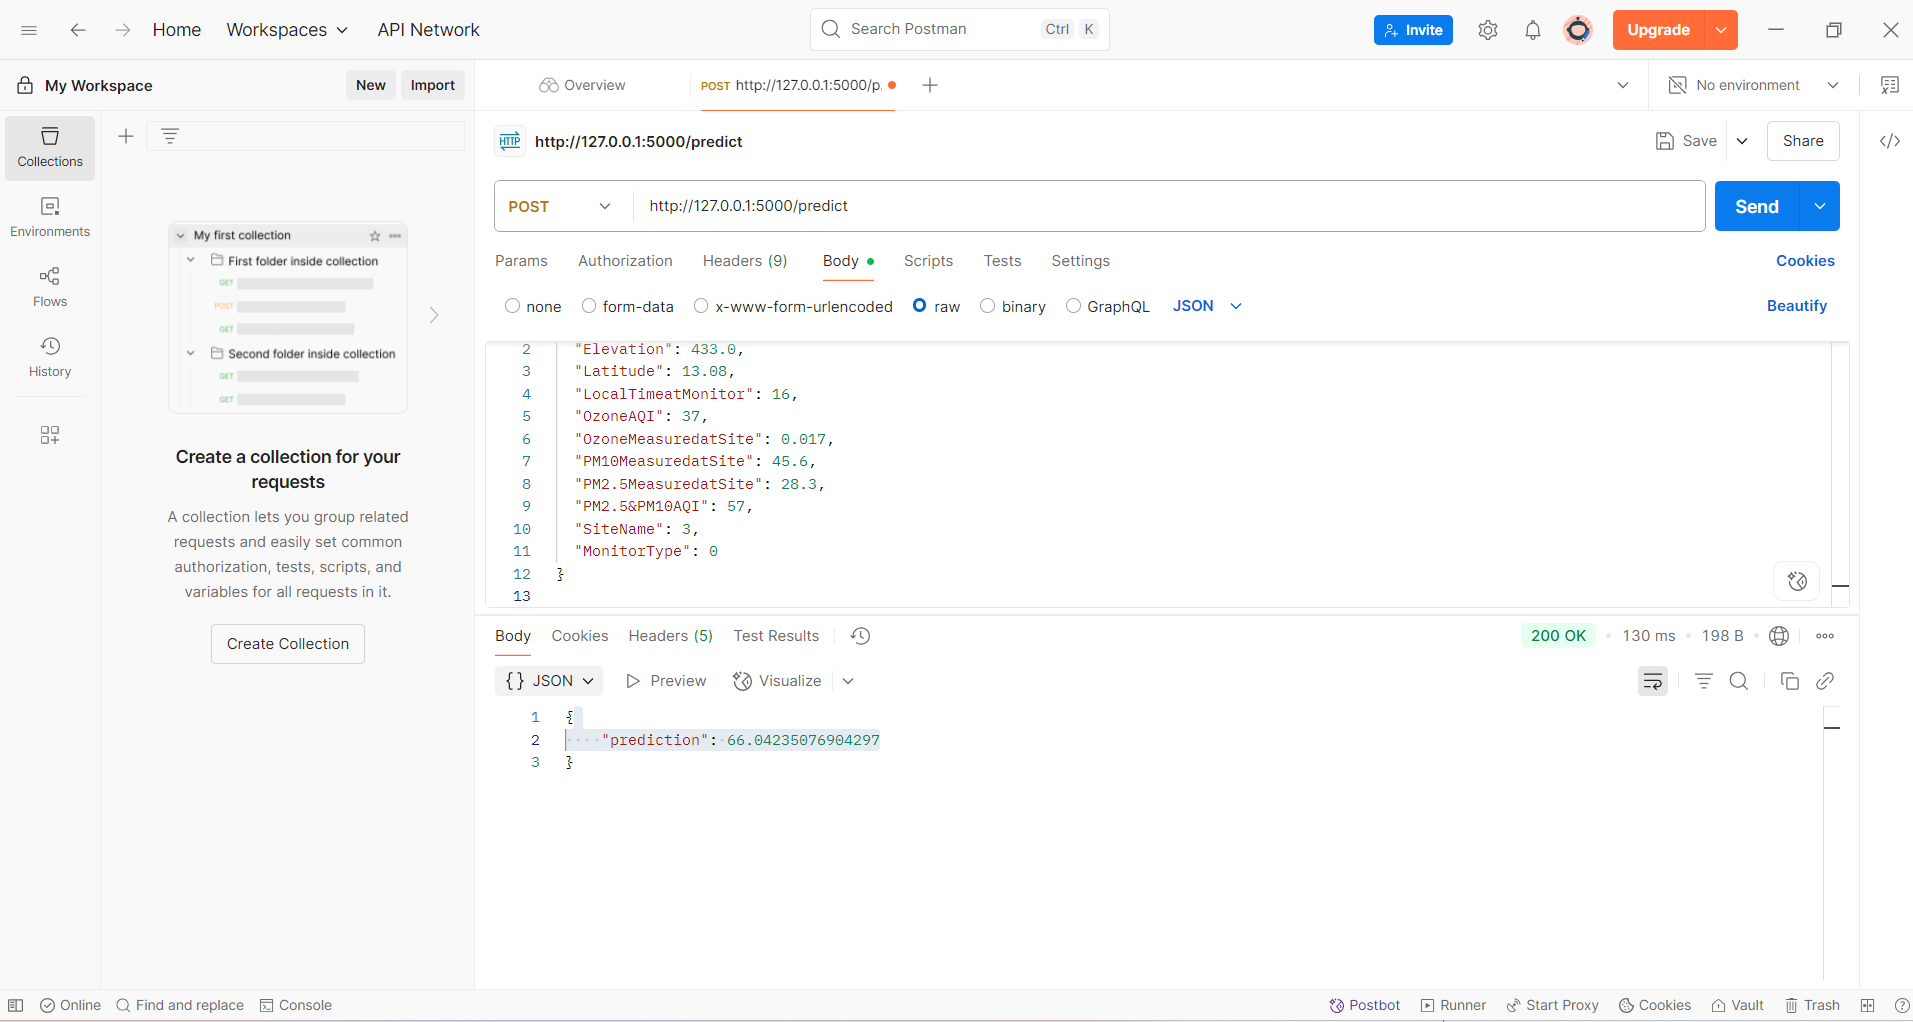

# Creating model using pipeline

In [75]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import joblib

# STEP 1: Load and clean data
df = pd.read_csv("Air Now Current Monitor Data Public.csv")
df.columns = df.columns.str.replace(" ", "")  # Clean column names

# Drop rows with missing/infinite target values
df = df[~df["Ozone&PMAQI"].isna()]
df = df[np.isfinite(df["Ozone&PMAQI"])]

# STEP 2: Define target and features
y = df["Ozone&PMAQI"]
X = df.drop(columns=["Ozone&PMAQI"])

# STEP 3: Custom transformer to drop unwanted columns
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, drop_cols):
        self.drop_cols = drop_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.drop_cols, errors='ignore')

# Columns to drop before preprocessing
drop_cols = [
    'GMTOffsetAmount(hours)', 'y', 'x','CountryCode', 'EPARegion',
    'OzoneUnitofMeasure', 'PM10UnitofMeasure', 'PM2.5UnitofMeasure',
    'ValidTime','EPAAQSID', 'ObjectId','Ozone&PMAQI(ForLabeling)', 'Ozone&PMAQI(ForSorting)',
    'OzoneAQI(ForLabeling)', 'OzoneAQI(ForSorting)', 'PM10AQI(ForLabeling)', 'PM10AQI(ForSorting)',
    'PM2.5AQI(ForLabeling)', 'PM2.5AQI(ForSorting)',
    'PM2.5&PM10AQI(ForLabeling)', 'PM2.5&PM10AQI(ForSorting)'
]

# Drop specified columns
X_dropped = X.drop(columns=drop_cols, errors='ignore')

# STEP 4: Identify numerical and categorical features
num_cols = X_dropped.select_dtypes(include='number').columns.tolist()
cat_cols = X_dropped.select_dtypes(include='object').columns.tolist()

# STEP 5: Define preprocessing pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])

# STEP 6: Define full modeling pipeline
pipeline = Pipeline([
    ("dropper", ColumnDropper(drop_cols=drop_cols)),
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(random_state=42))
])

# STEP 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 8: Grid search parameters
param_grid = {
    "regressor__n_estimators": [50, 100, 200],
    "regressor__learning_rate": [0.01, 0.1, 0.2],
    "regressor__max_depth": [3, 5, 7]
}

# STEP 9: Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# STEP 10: Best model and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nBest Parameters:")
print(grid_search.best_params_)

print("\nModel Performance:")
print("R² Score: {:.2f}%".format(r2_score(y_test, y_pred) * 100))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))

# STEP 11: Save best model
joblib.dump(best_model, "xgb_air_quality_model.pkl")
print("\nModel saved as 'xgb_air_quality_model.pkl'")


Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best Parameters:
{'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}

Model Performance:
R² Score: 97.44%
MSE: 4.9764085802332385
RMSE: 2.230786538473199
MAE: 1.1978089809417725

Model saved as 'xgb_air_quality_model.pkl'


## Model Deployment

from flask import Flask, request, jsonify
import joblib
import pandas as pd

### Load the saved pipeline model
model = joblib.load('xgb_air_quality_pipeline_with_drop.pkl')

### Initialize Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return " XGB Air Quality Pipeline API is running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get input JSON
        data = request.get_json(force=True)
        input_df = pd.DataFrame([data])

        # Predict using pipeline model
        prediction = model.predict(input_df)

        # Log input and prediction
        with open("monitoring_log.txt", "a") as file:
            file.write(f"Input: {input_df.to_dict()}, Prediction: {prediction[0]}\n")

        return jsonify({'prediction': float(prediction[0])})
    
    except Exception as e:
        return jsonify({'error': str(e)})

### Run app
if __name__ == '__main__':
    app.run(debug=False, port=5000)


In [76]:
#cd C:\Users\Windows10\DATA24     
#python appp.py


#output- http://127.0.0.1:5000

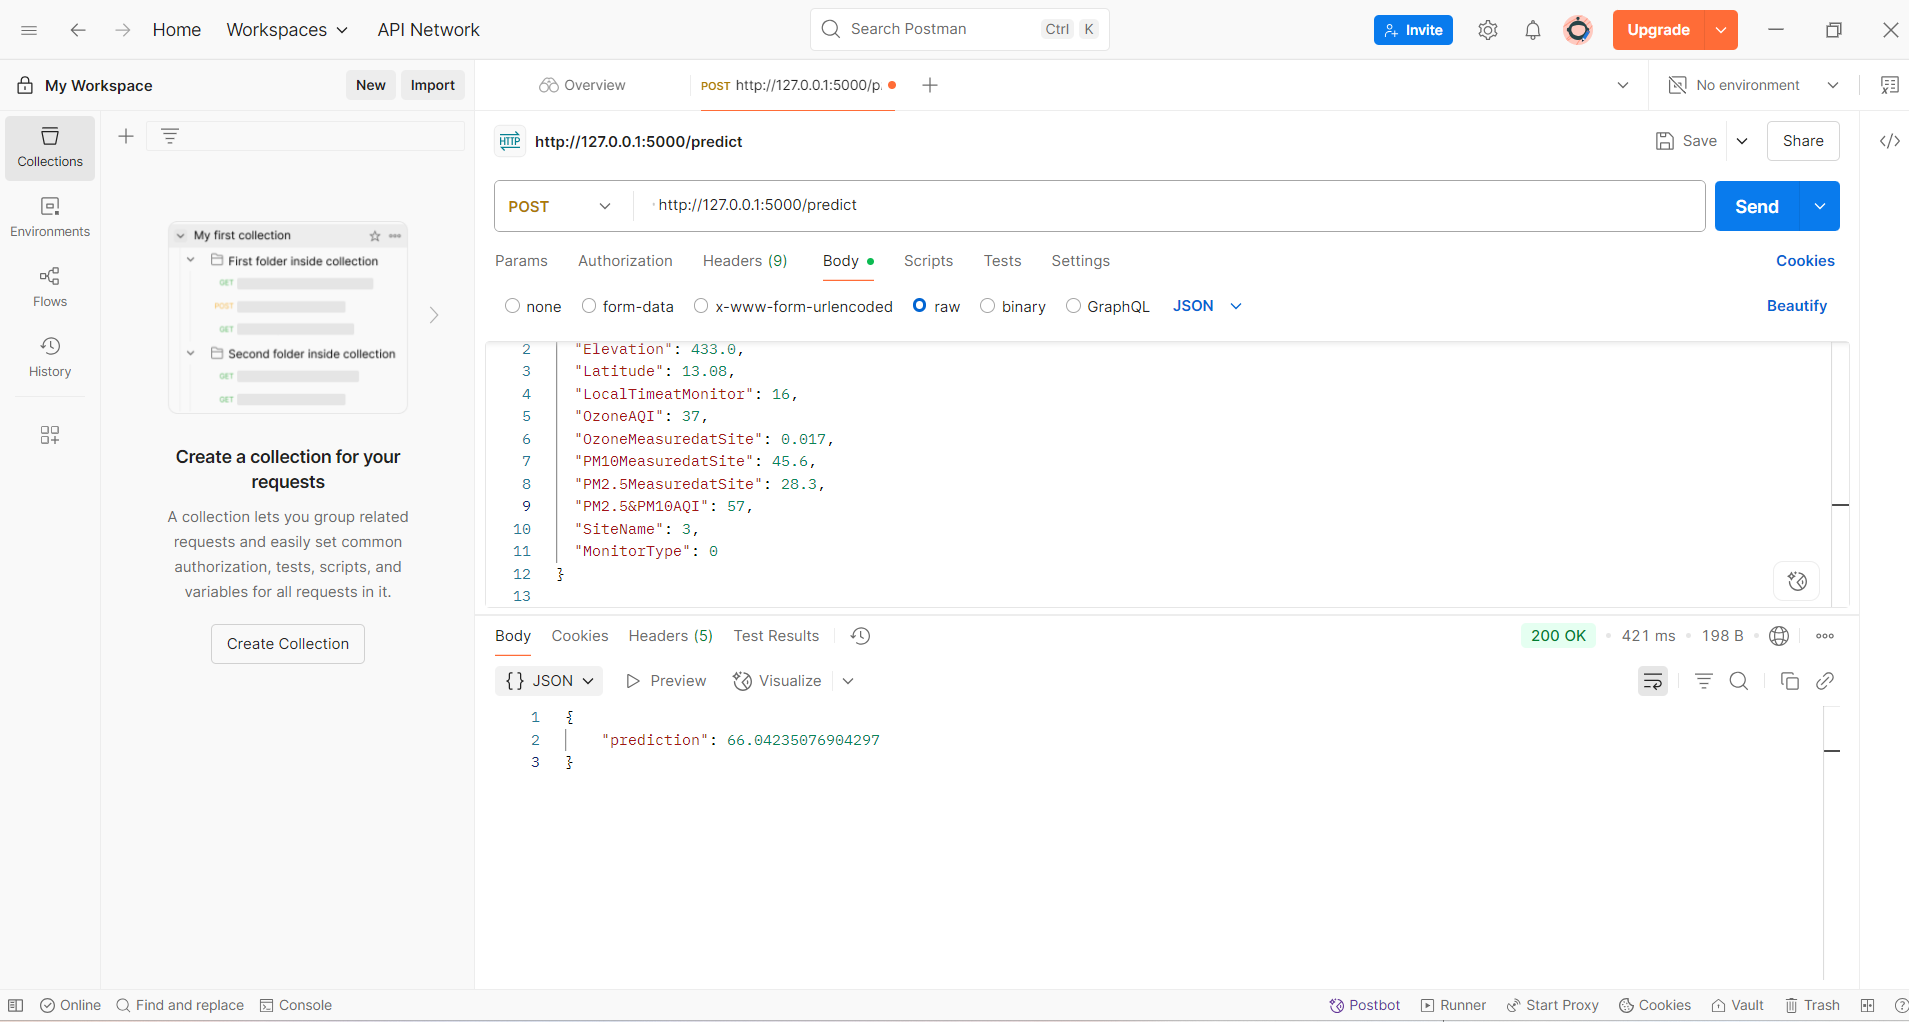